In [2]:
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
plt.rcParams['figure.dpi'] = 300

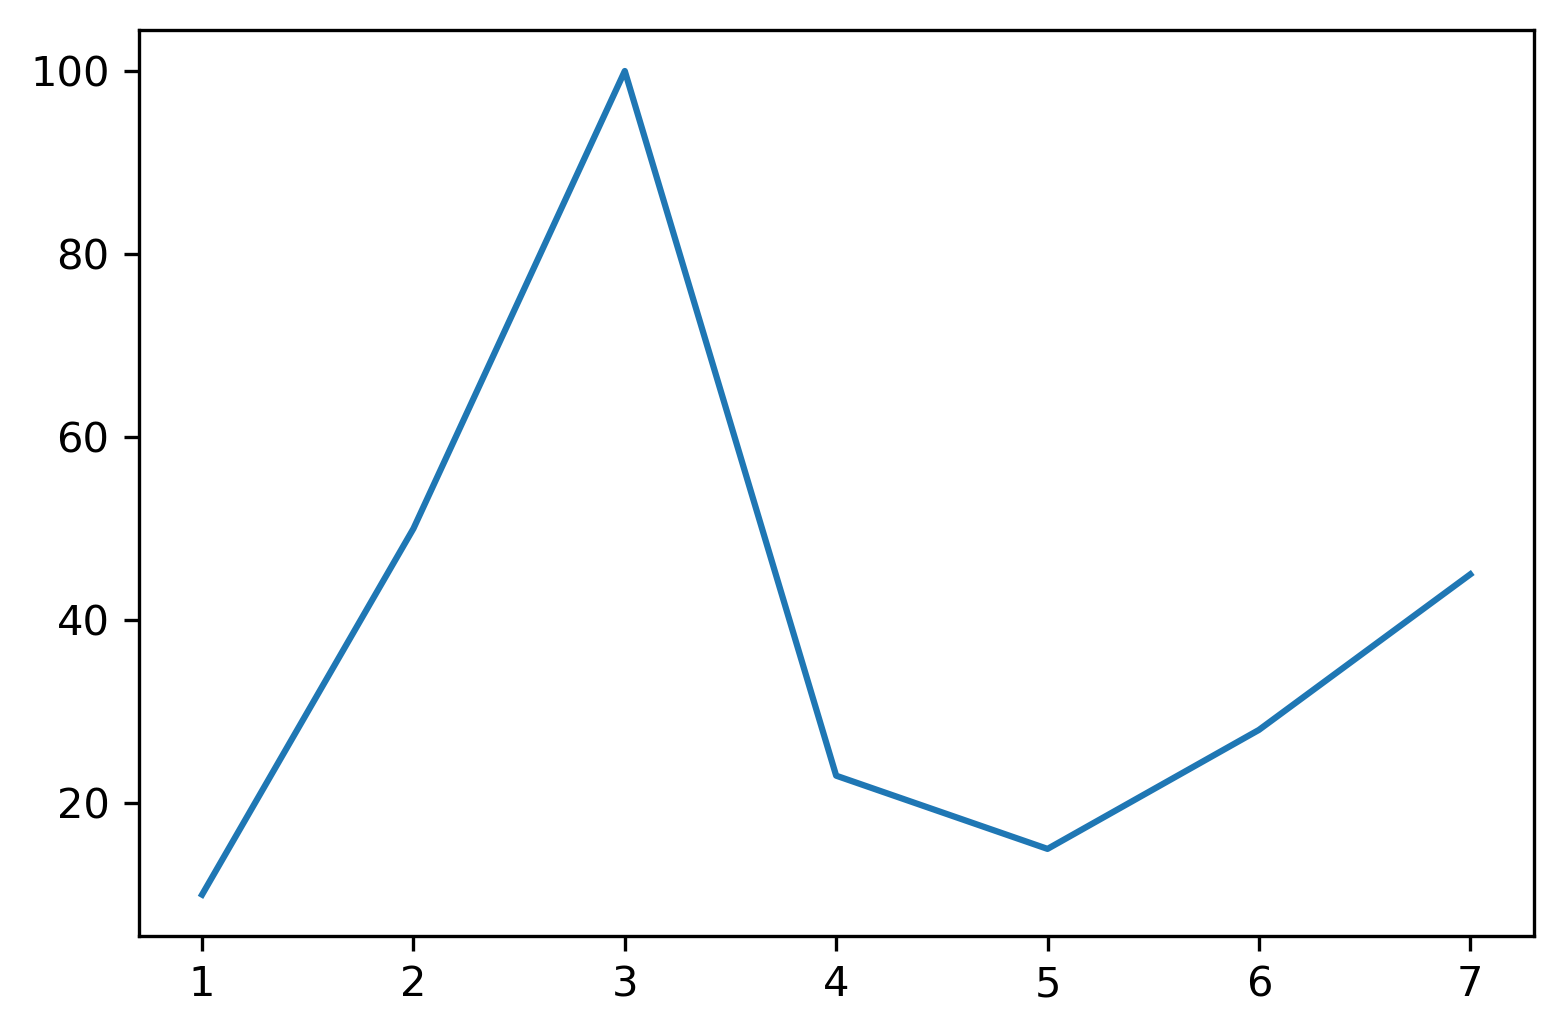

In [2]:


def onselect(xmin, xmax):
    print(xmin, xmax)
    return xmin, xmax

fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7], [10, 50, 100, 23, 15, 28, 45])

span = SpanSelector(ax, onselect, 'horizontal', 
                    useblit=True, rectprops=dict(alpha=0.5, facecolor='red'))       
plt.show()

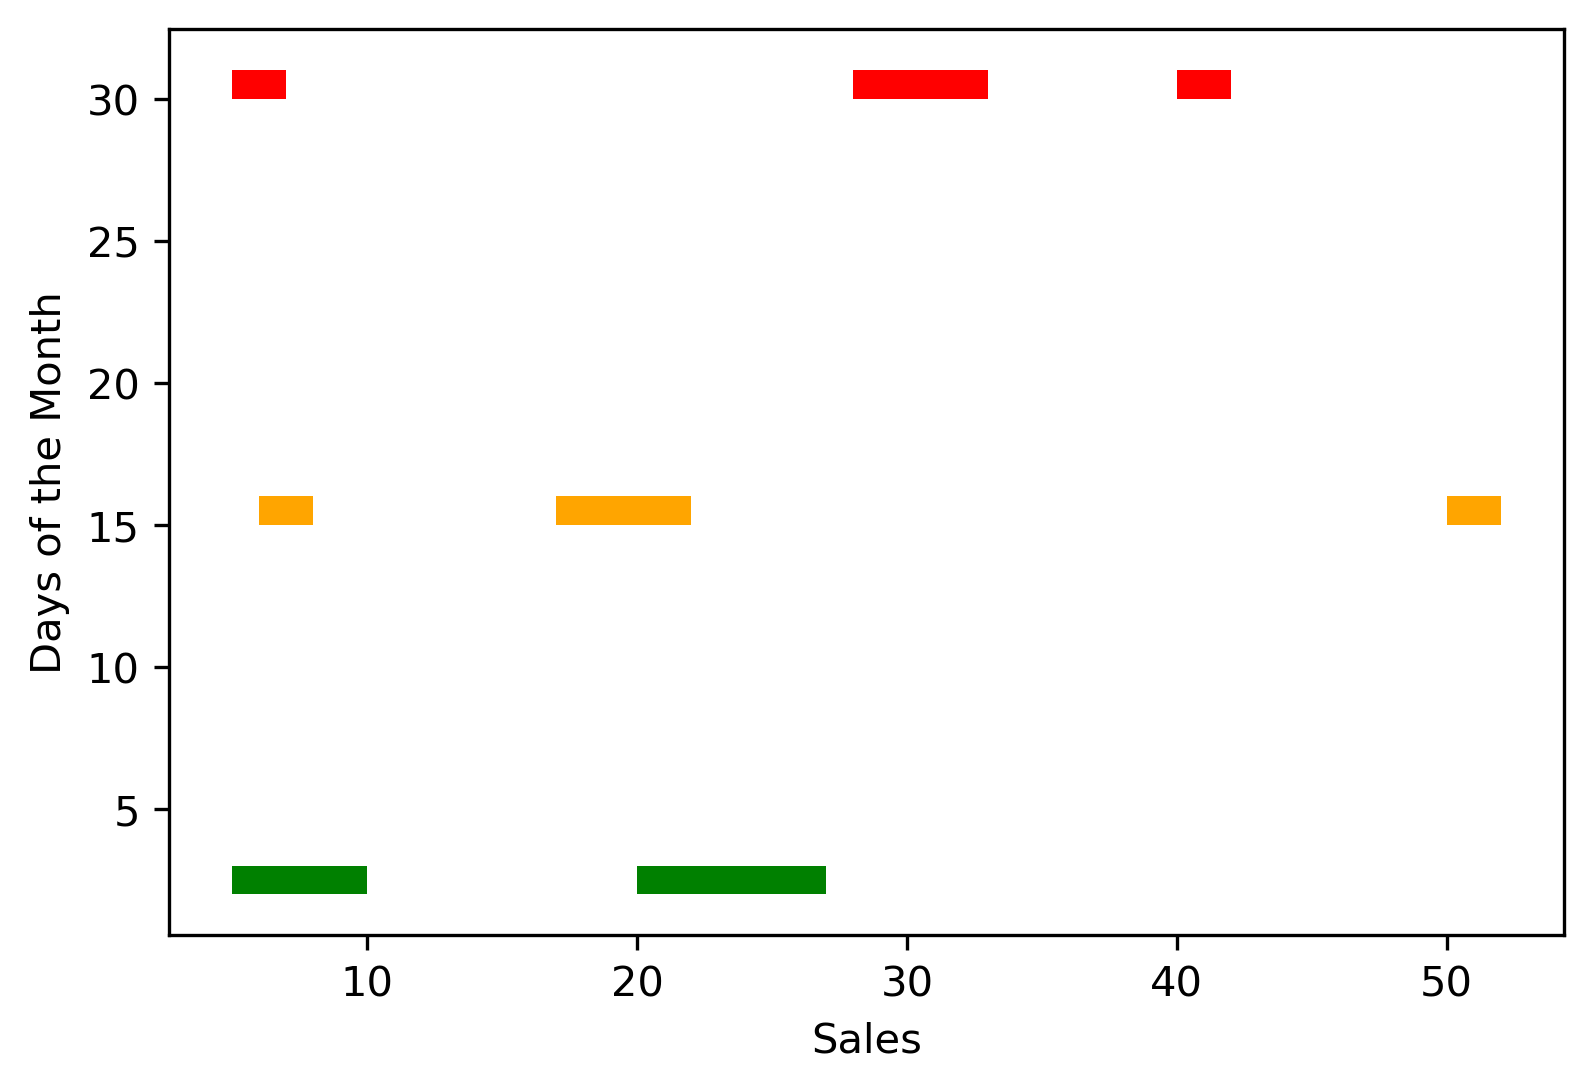

In [4]:
import matplotlib.pyplot as plt 
# Defining the x and y ranges 
xranges = [(5,5), (20,5),(20,7)] 
yrange = (2,1) 
# Plotting the broken bar chart 
plt.broken_barh(xranges, yrange, facecolors='green') 

xranges = [(6,2), (17,5),(50,2)] 
yrange = (15,1) 
plt.broken_barh(xranges, yrange, facecolors='orange') 

xranges = [(5,2), (28,5),(40,2)] 
yrange = (30,1) 
plt.broken_barh(xranges, yrange, facecolors='red') 

plt.xlabel('Sales') 
plt.ylabel('Days of the Month') 
plt.show()

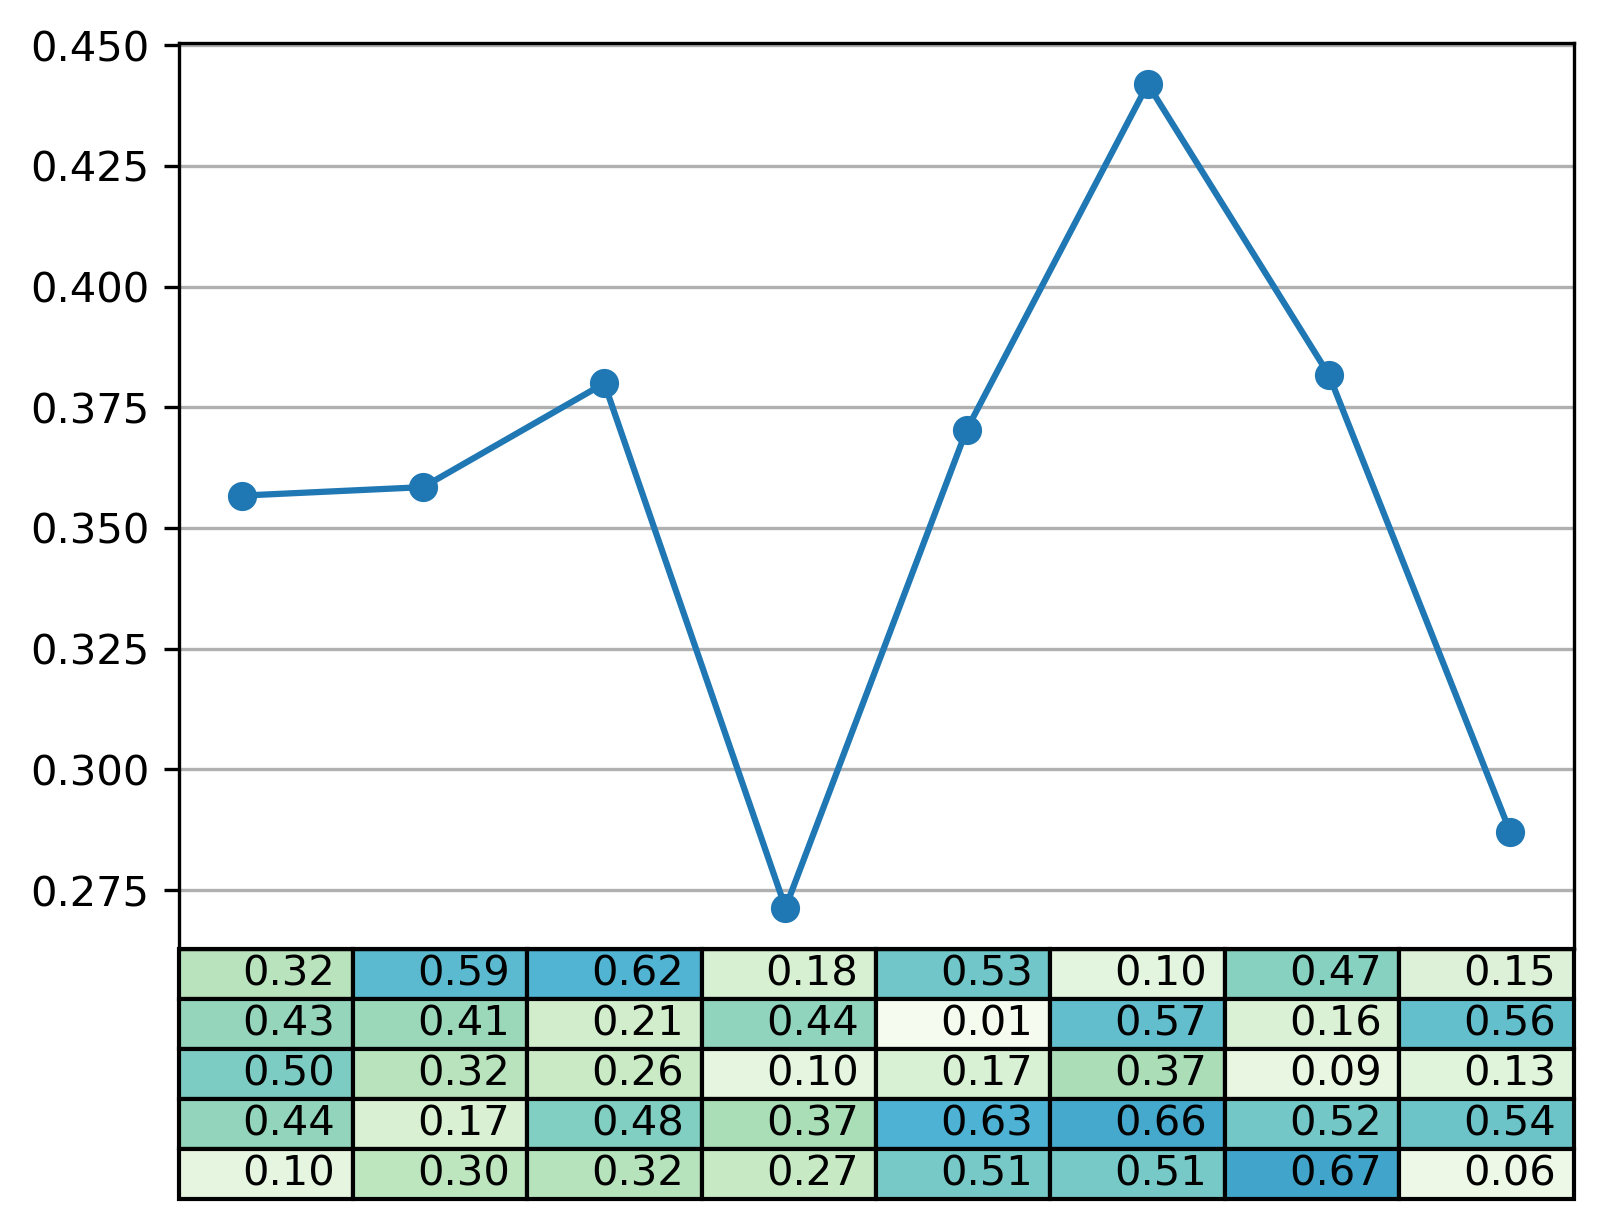

In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

x = np.random.rand(5, 8)*.7 
plt.plot(x.mean(axis=0), '-o', label='average per column') 
plt.xticks([]) 
plt.grid()
plt.table(cellText=[['%1.2f' % xxx for xxx in xx] for xx in x],cellColours=plt.cm.GnBu(x),loc='bottom') 
plt.show()

In [66]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('World University Rankings/cwurData.csv') 
im = image.imread('motion.jpg') # Image

In [9]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [21]:
university_top_5 = df[df['year']==2015][:5]

In [22]:
university_top_5

world_rank                            institution         country  \
1200           1                     Harvard University             USA   
1201           2                    Stanford University             USA   
1202           3  Massachusetts Institute of Technology             USA   
1203           4                University of Cambridge  United Kingdom   
1204           5                   University of Oxford  United Kingdom   

      national_rank  quality_of_education  alumni_employment  \
1200              1                     1                  1   
1201              2                     9                  2   
1202              3                     3                 11   
1203              1                     2                 10   
1204              2                     7                 13   

      quality_of_faculty  publications  influence  citations  broad_impact  \
1200                   1             1          1          1           1.0   
1201                   4             5          3          3           4.0   
1202                   2            15          2          2           2.0   
1203                   5            11          6         12          13.0   
1204                  10             7         12          7           9.0   

      patents   score  year  
1200        3  100.00  2015  
1201       10   98.66  2015  
1202        1   97.54  2015  
1203       48   96.81  2015  
1204       15   96.46  2015

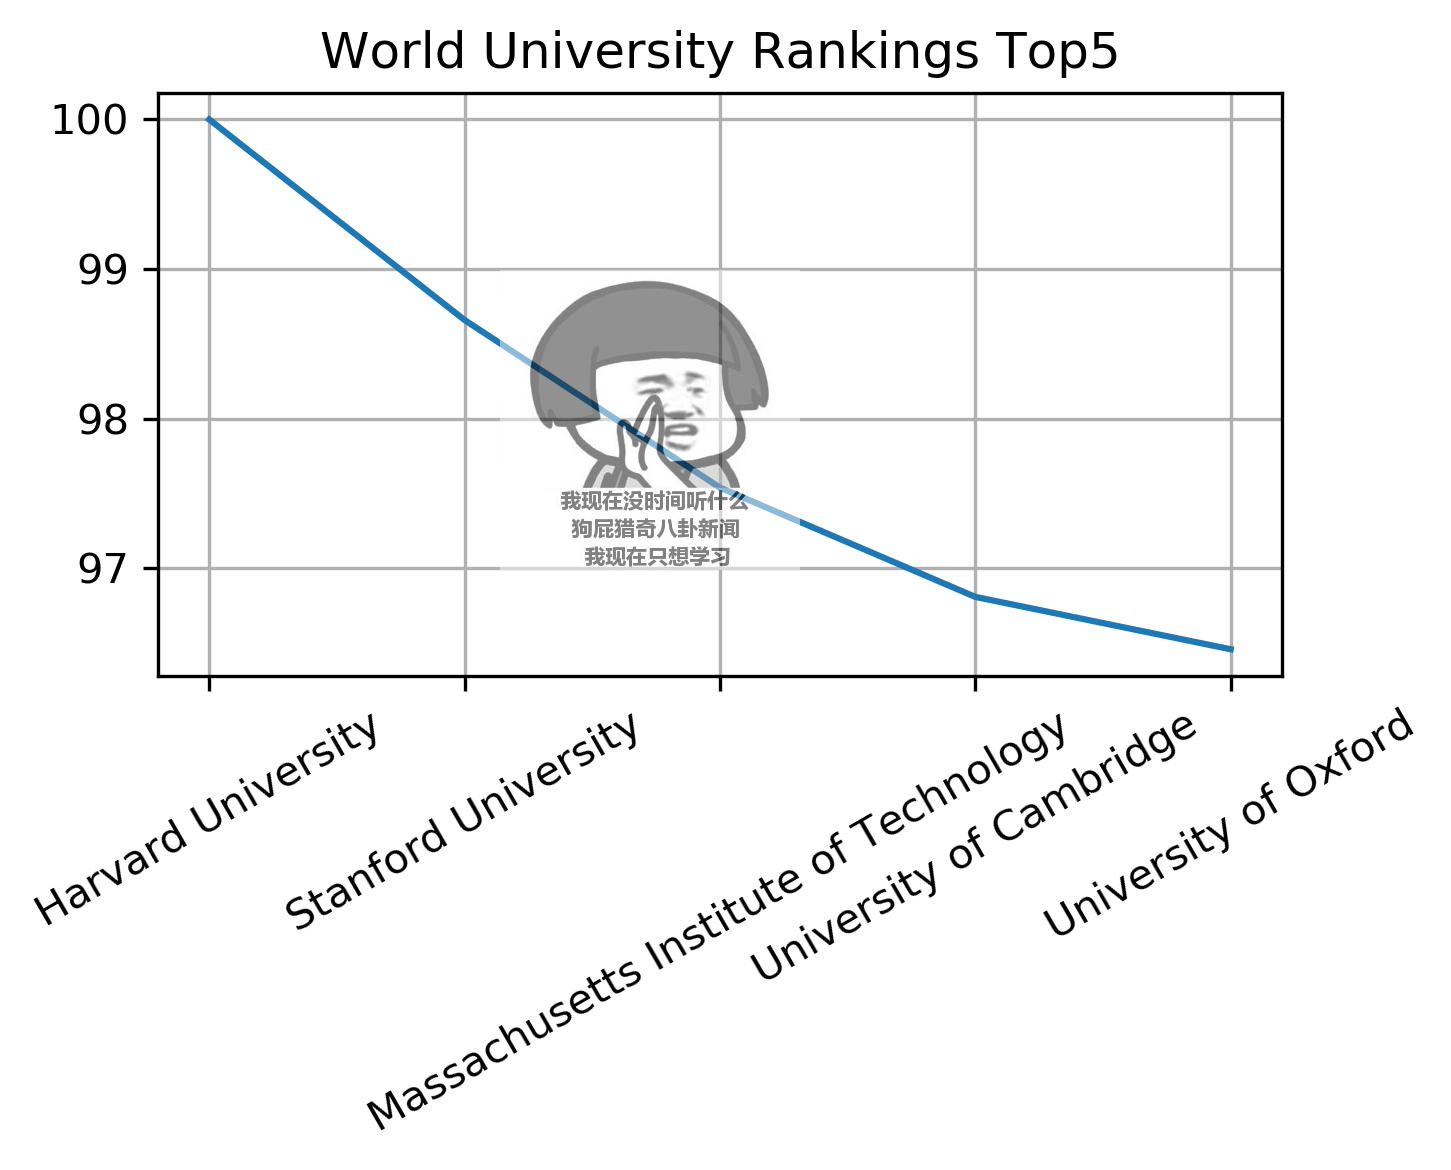

In [69]:
university_top_5 = df[df['year']==2015][:5]
plt.figure(figsize=(5,4))
plt.plot('institution', 'score', data=university_top_5) 
plt.title('World University Rankings Top5')
plt.figimage(im, 500, 600, cmap='ocean', alpha=.5)
plt.xticks(rotation=30)
plt.grid() 
plt.tight_layout()
plt.show()

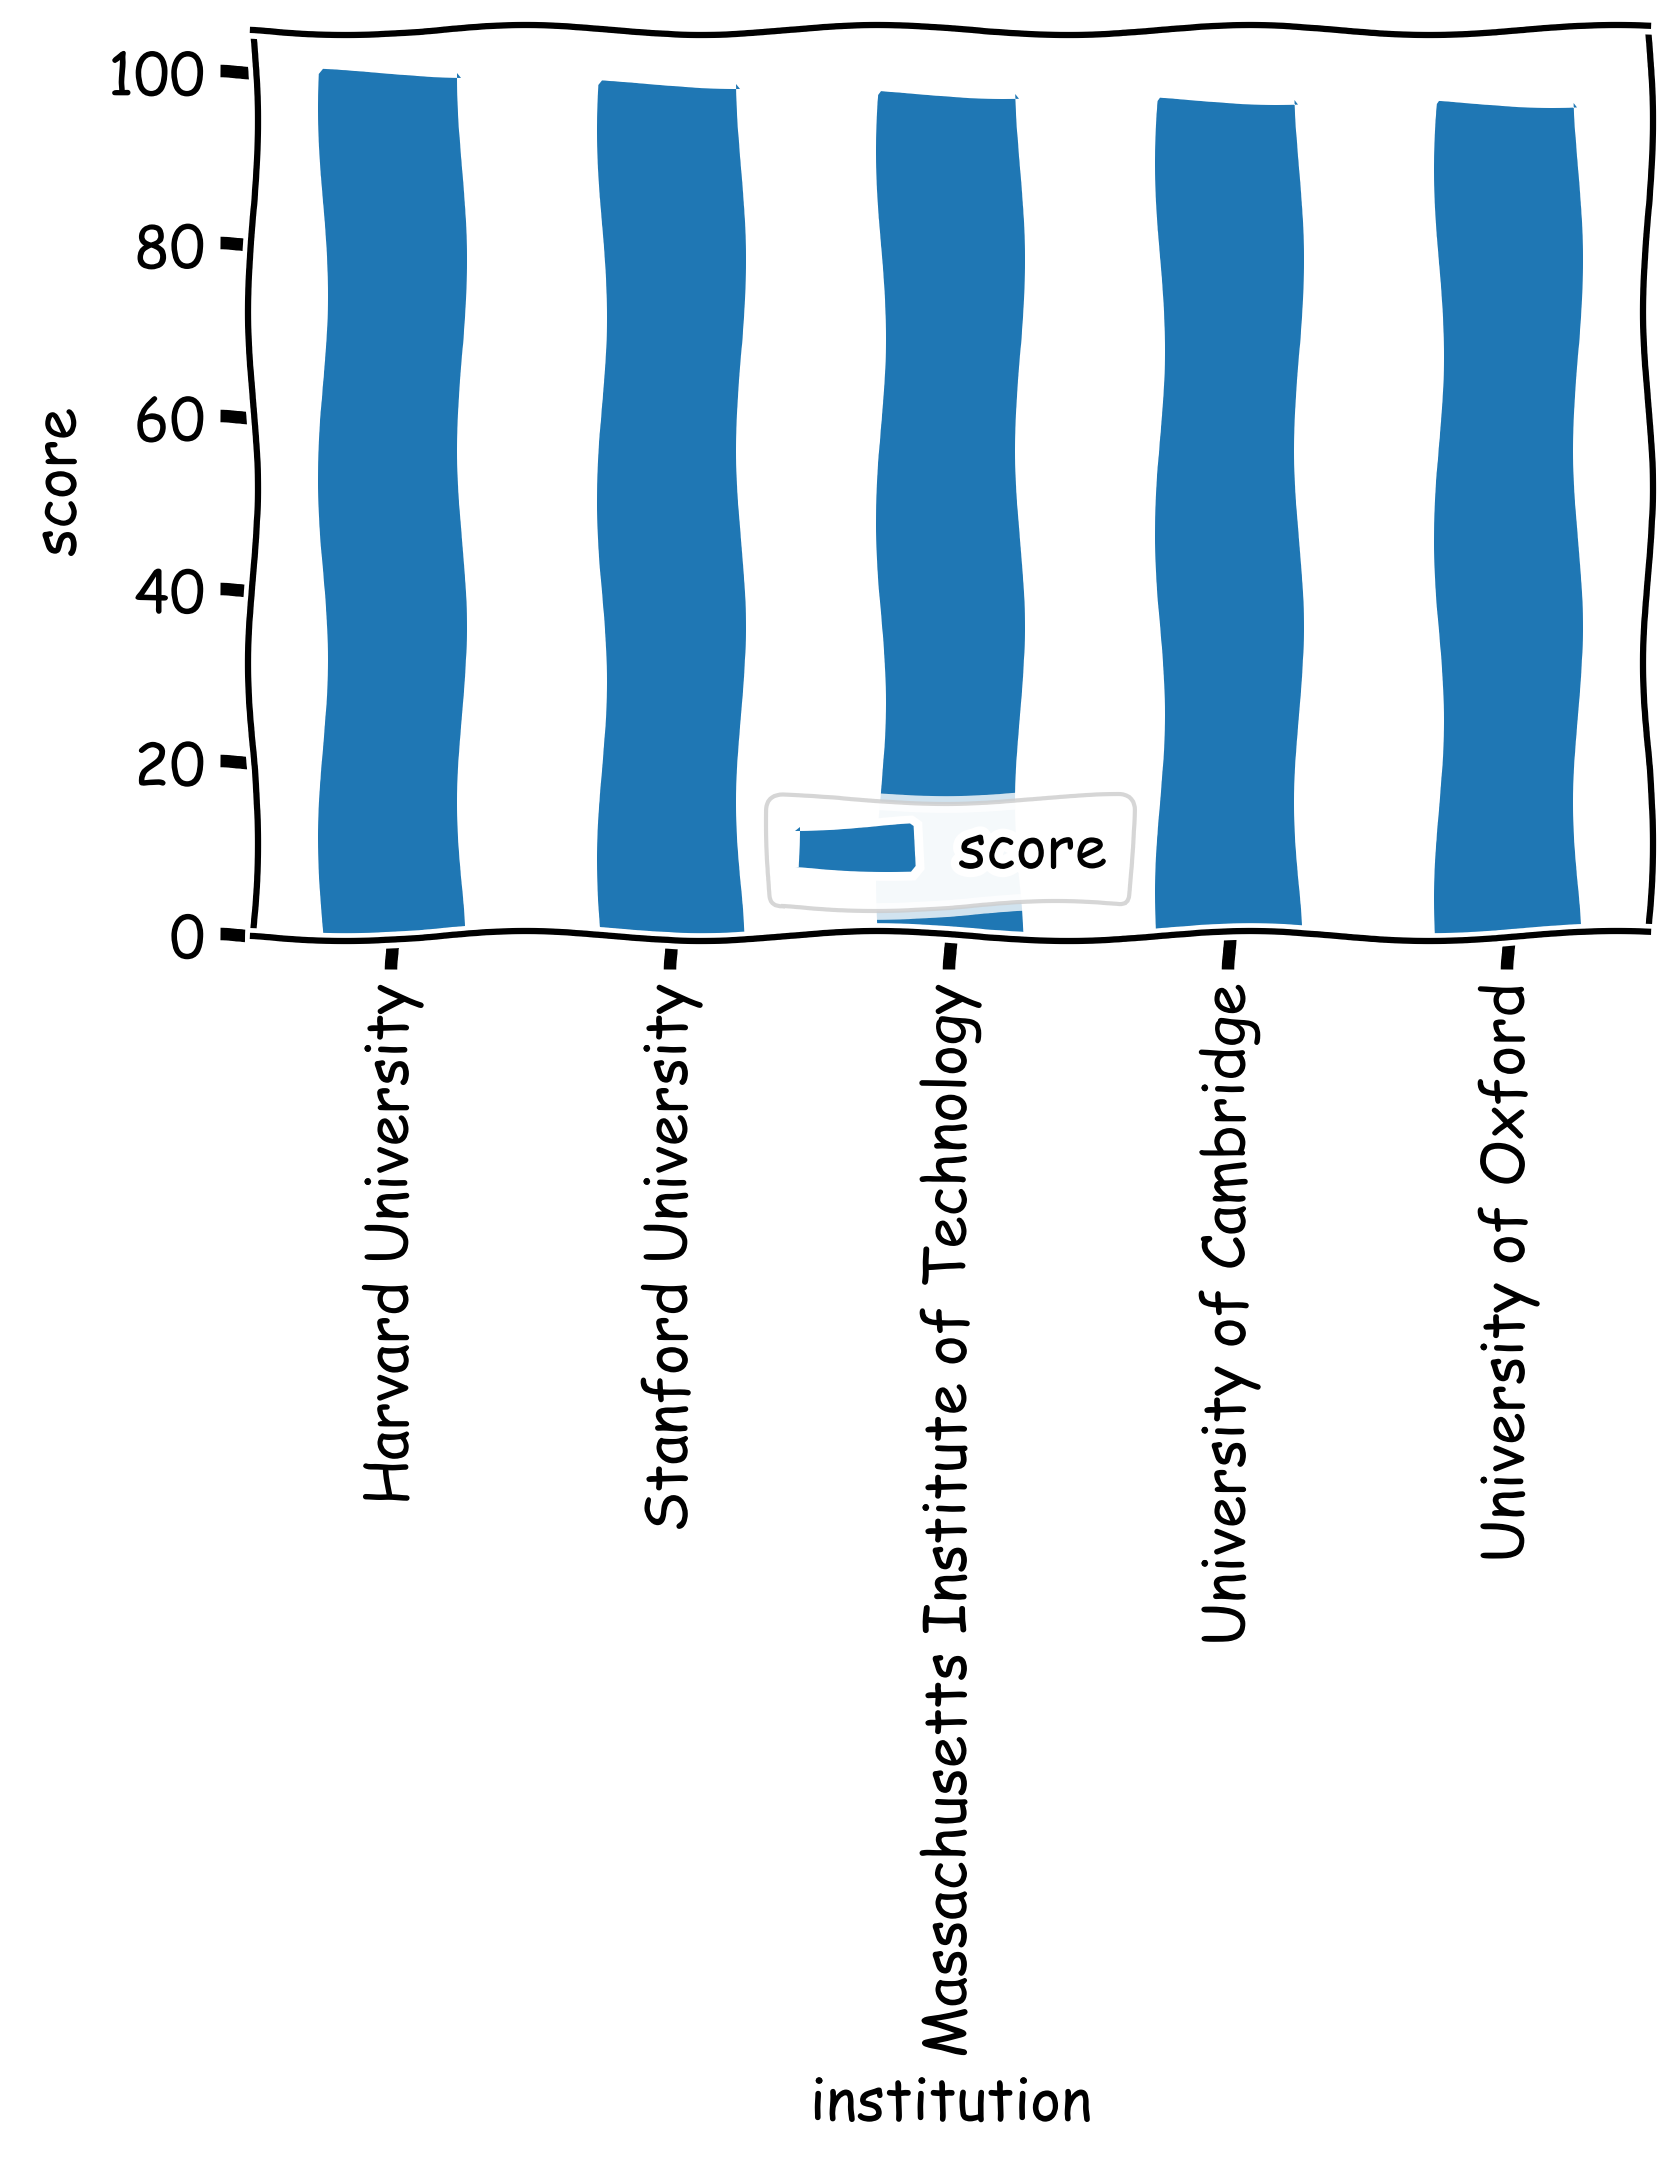

In [76]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.read_csv('World University Rankings/cwurData.csv') 
university_top_5 = df[df['year']==2015][:5]

# calling xkcd() method 
plt.xkcd(scale=5, length=400) 
university_top_5.plot(x='institution',y='score',kind='bar') 
plt.ylabel('score') 
# plt.xticks(rotation=-20) 
# plt.figure(figsize=(10,8)) 
plt.show()

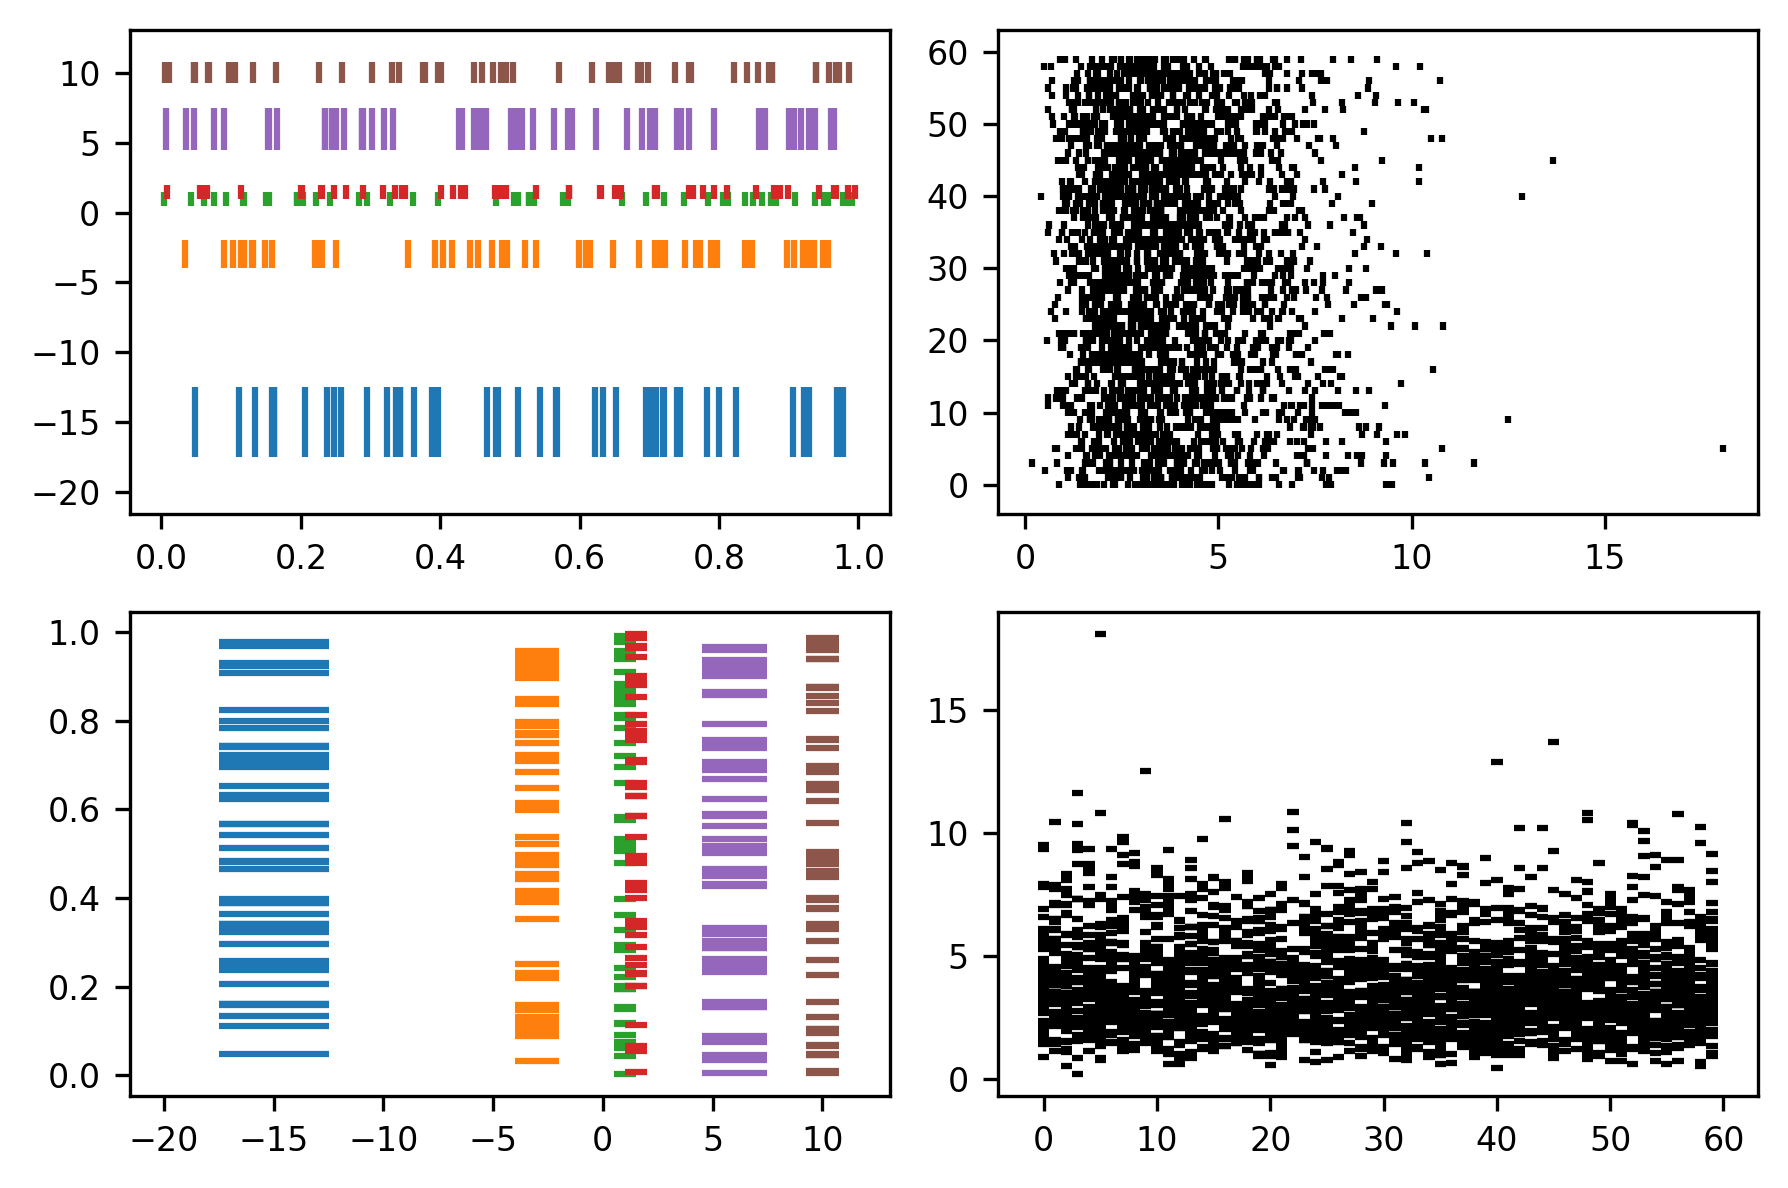

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = ['C{}'.format(i) for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = np.array([-15, -3, 1, 1.5, 6, 10])
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used fo aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.tight_layout()
plt.show()


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]


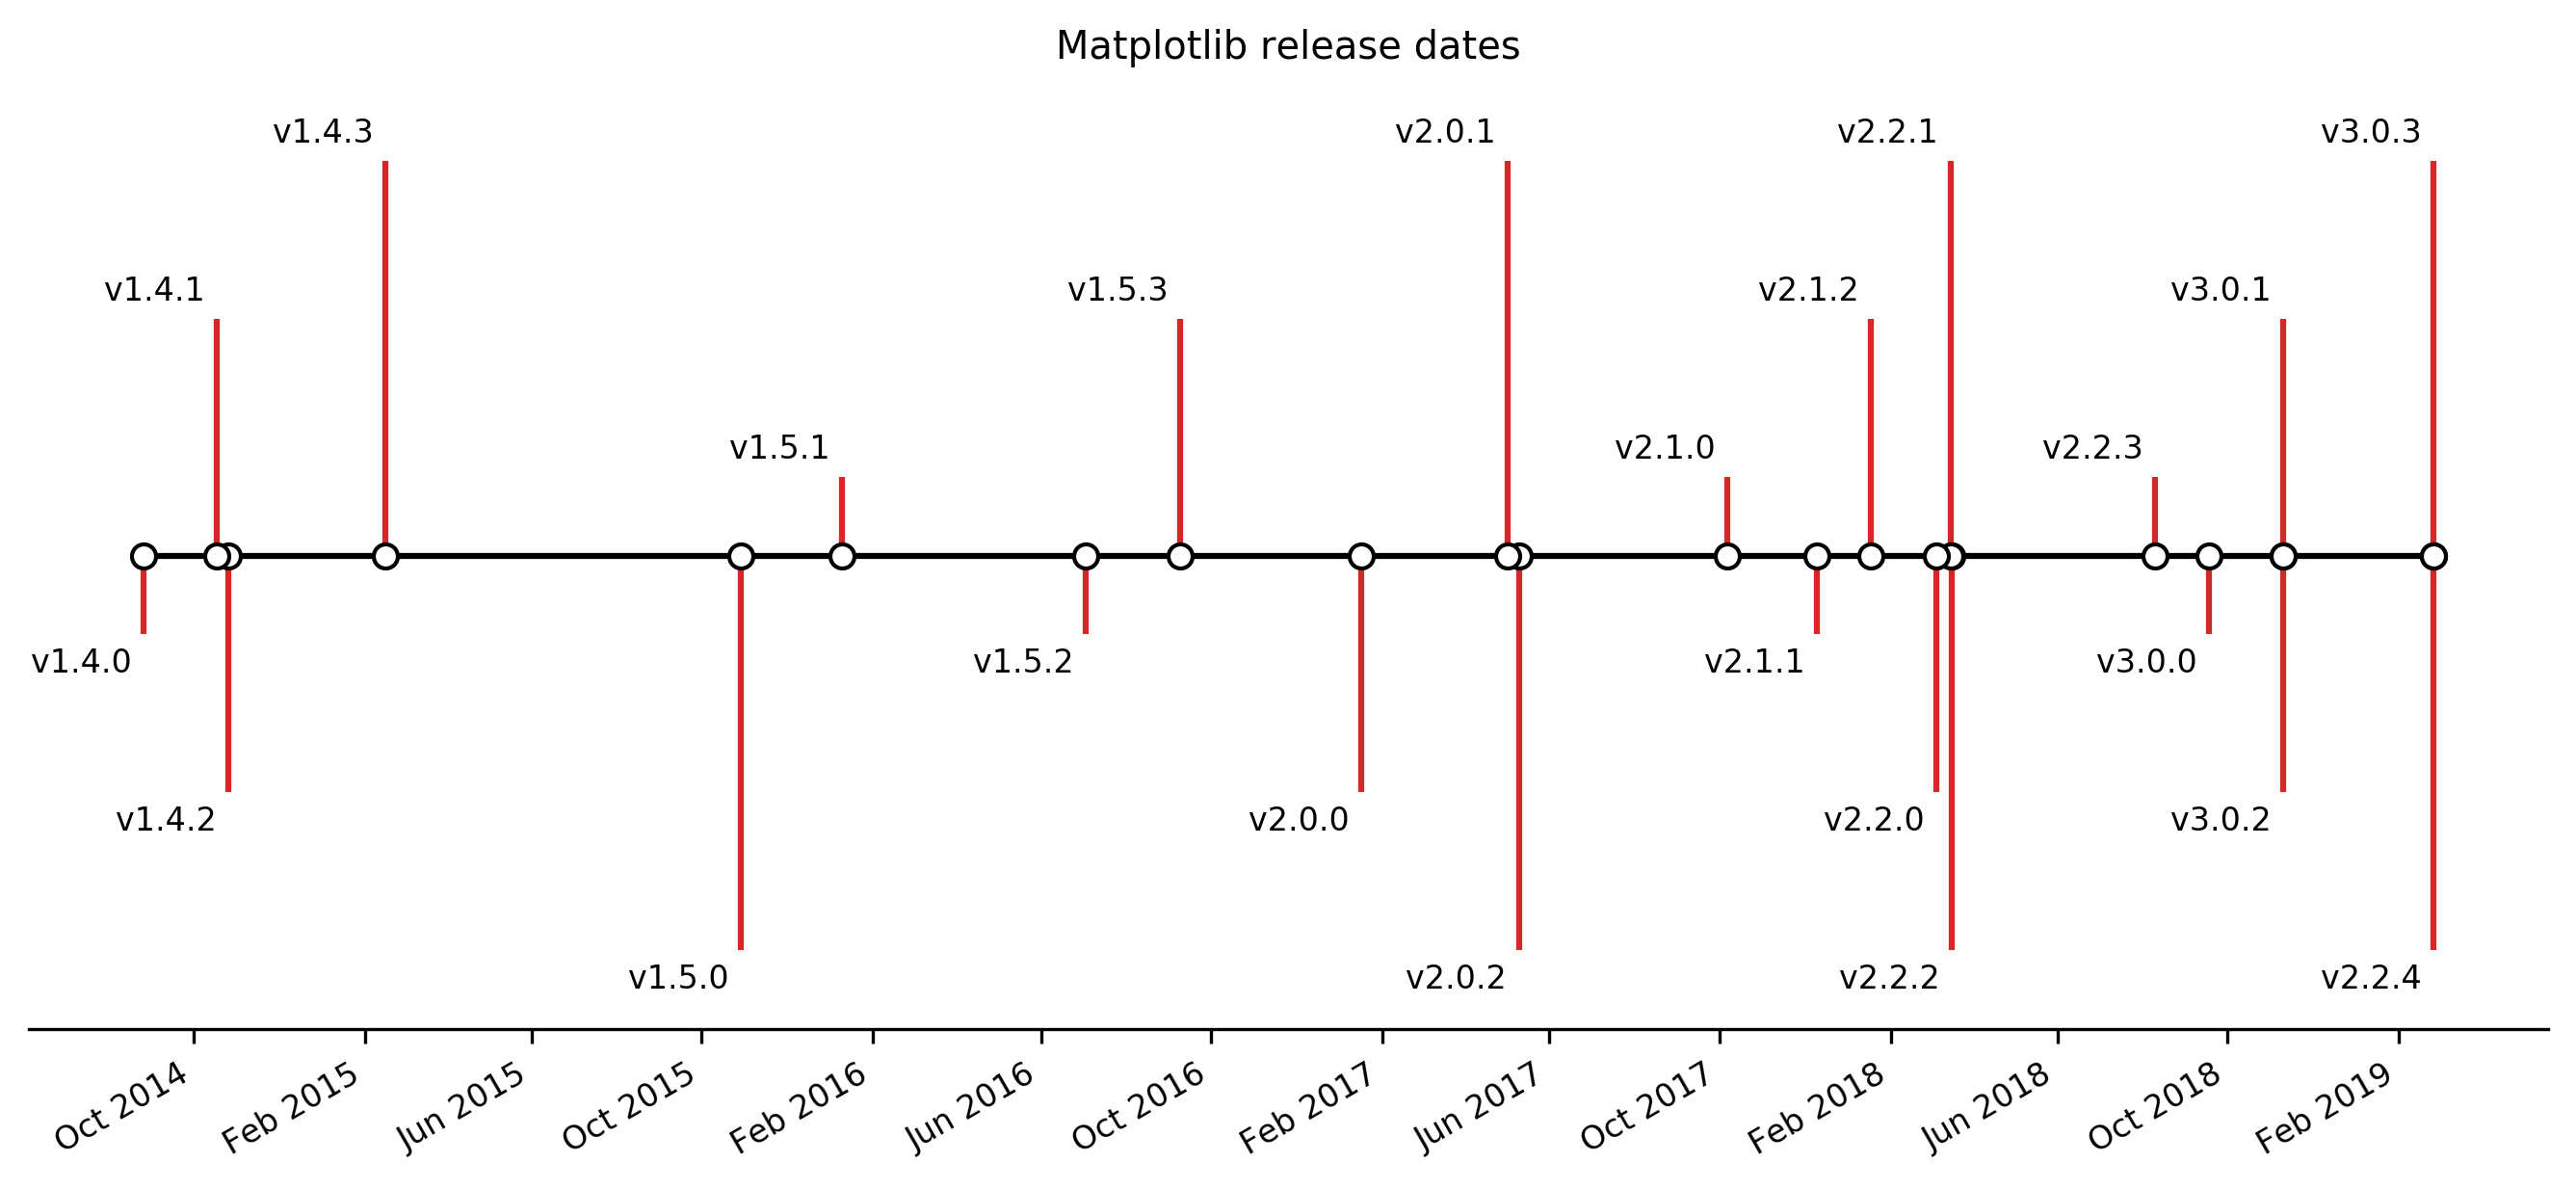

In [7]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()


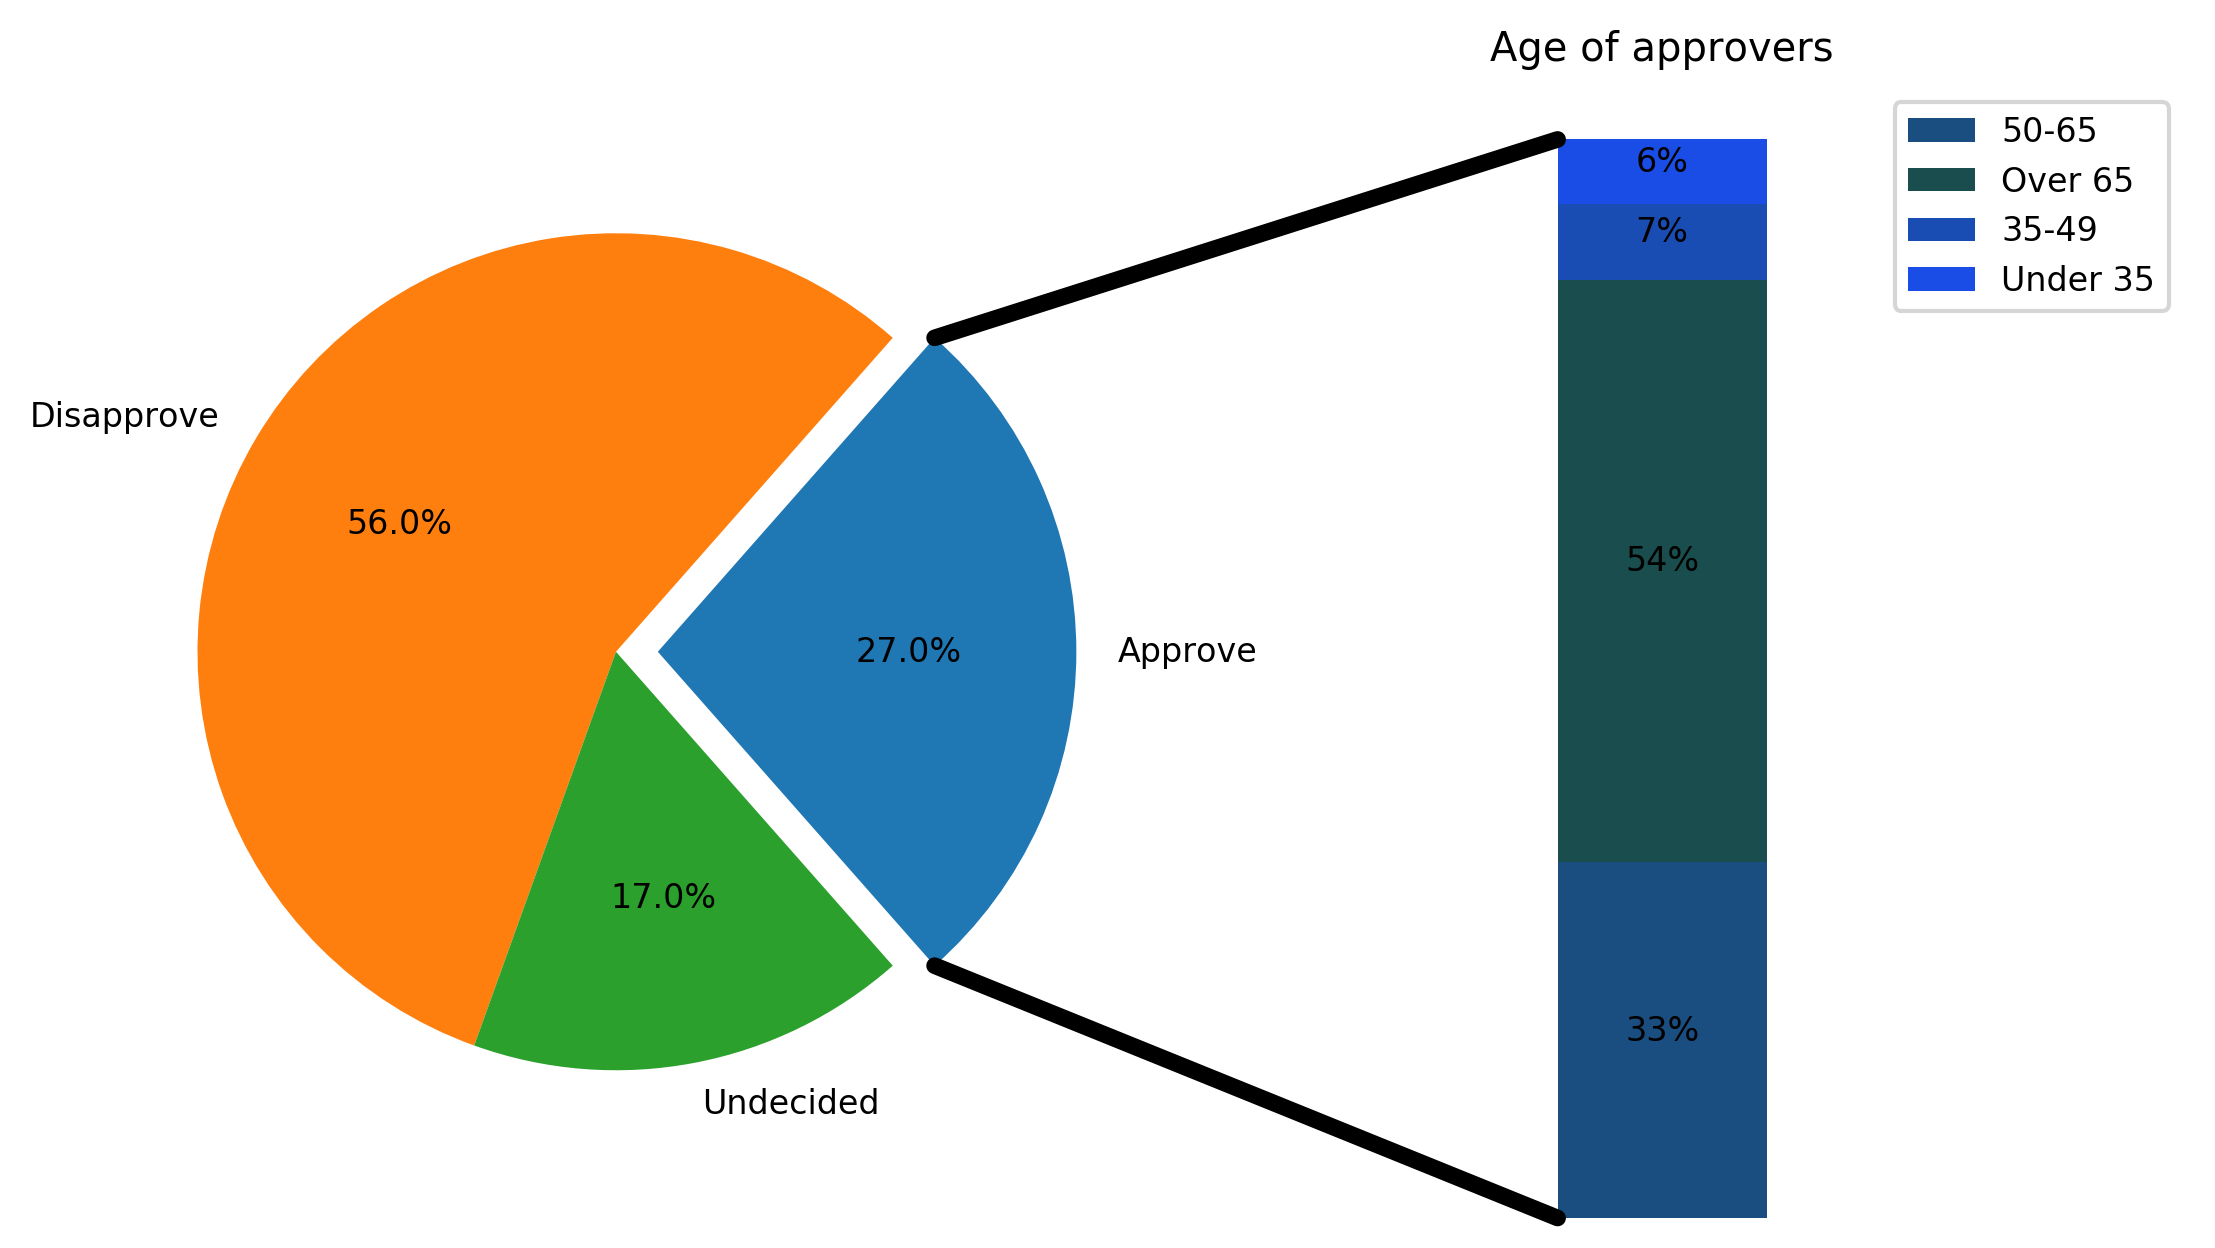

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.33, .54, .07, .06]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Age of approvers')
ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

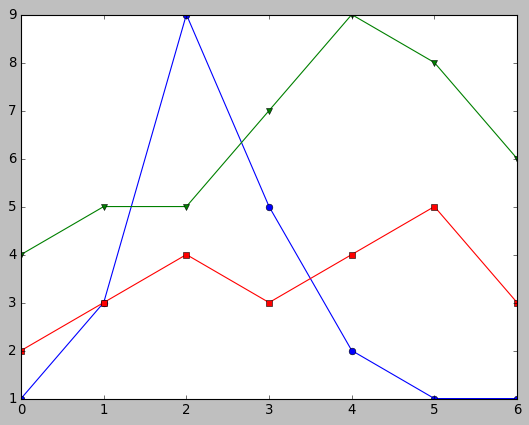

In [11]:
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
plt.show()

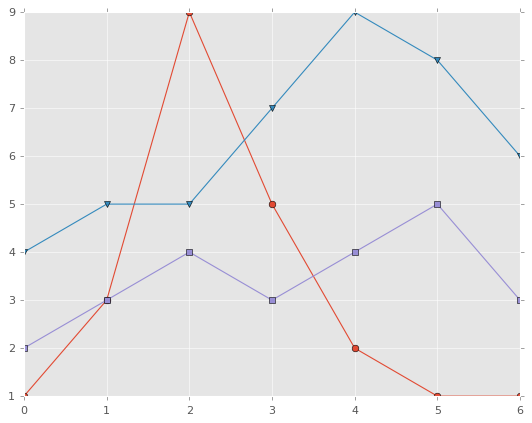

In [12]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
plt.show()

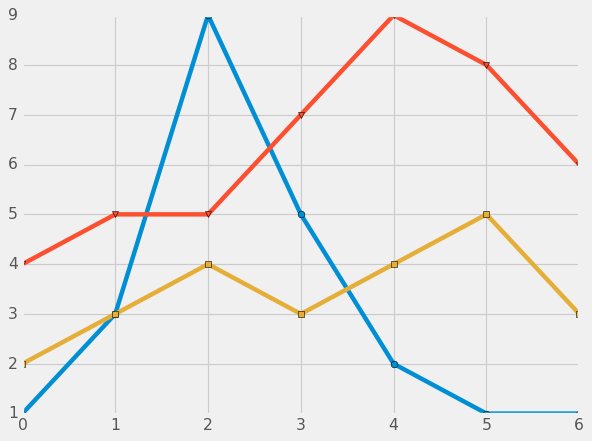

In [13]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
plt.show()

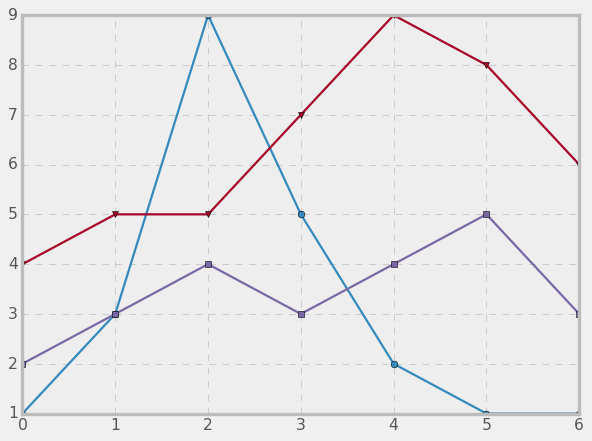

In [14]:
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
plt.show()

In [15]:
!pip install mplcyberpunk

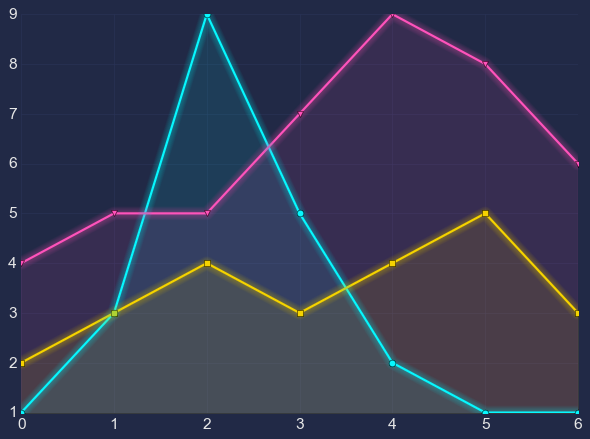

In [16]:
!pip install mplcyberpunk
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')

# Add glow effects-Optional
mplcyberpunk.add_glow_effects()
plt.show()

In [17]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7104 sha256=1566408b0a51e91fec127b713d3f9bdb2adf24f1451d61bbfe84d4ece9897109
  Stored in directory: c:\users\34123\appdata\local\pip\cache\wheels\2f\98\32\afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [37]:
university_top_10.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [89]:
university_top = pd.read_table('World University Rankings/cwur2020.txt', header=0).iloc[:20,:]
university_top

World Rank                            Institution        Location  \
0            1                     Harvard University             USA   
1            2  Massachusetts Institute of Technology             USA   
2            3                    Stanford University             USA   
3            4                University of Cambridge  United Kingdom   
4            5                   University of Oxford  United Kingdom   
5            6                    Columbia University             USA   
6            7                   Princeton University             USA   
7            8             University of Pennsylvania             USA   
8            9                  University of Chicago             USA   
9           10                        Yale University             USA   
10          11     California Institute of Technology             USA   
11          12     University of California, Berkeley             USA   
12          13                     Cornell University             USA   
13          14                    University of Tokyo           Japan   
14          15               Johns Hopkins University             USA   
15          16      University of Michigan, Ann Arbor             USA   
16          17                Northwestern University             USA   
17          18  University of California, Los Angeles             USA   
18          19              University College London  United Kingdom   
19          20                        Duke University             USA   

    National Rank Quality of Education Alumni Employment Quality of Faculty  \
0               1                    3                 1                  1   
1               2                    4                11                  2   
2               3                   10                 4                  3   
3               1                    1                21                  4   
4               2                    7                26                  9   
5               4                   11                14                 10   
6               5                    6                15                  7   
7               6                   14                 9                 43   
8               7                    8                18                 29   
9               8                    5                35                 11   
10              9                    2               128                  5   
11             10                    9                57                  8   
12             11                   13                28                 17   
13              1                   37                 7                105   
14             12                   20               188                 22   
15             13                   32                37                 82   
16             14                  139                17                 46   
17             15                   49                63                 19   
18              3                   33               666                 14   
19             16                   61                51                 16   

   Research Performance  Score  
0                     1  100.0  
1                     7   96.7  
2                     2   95.2  
3                    11   94.1  
4                     4   93.3  
5                    15   92.6  
6                    71   92.0  
7                    12   91.6  
8                    22   91.1  
9                    20   90.7  
10                   74   90.4  
11                   14   90.1  
12                   24   89.8  
13                   27   89.5  
14                    6   89.3  
15                    5   89.0  
16                   29   88.8  
17                   10   88.6  
18                    8   88.4  
19                   21   88.2

500

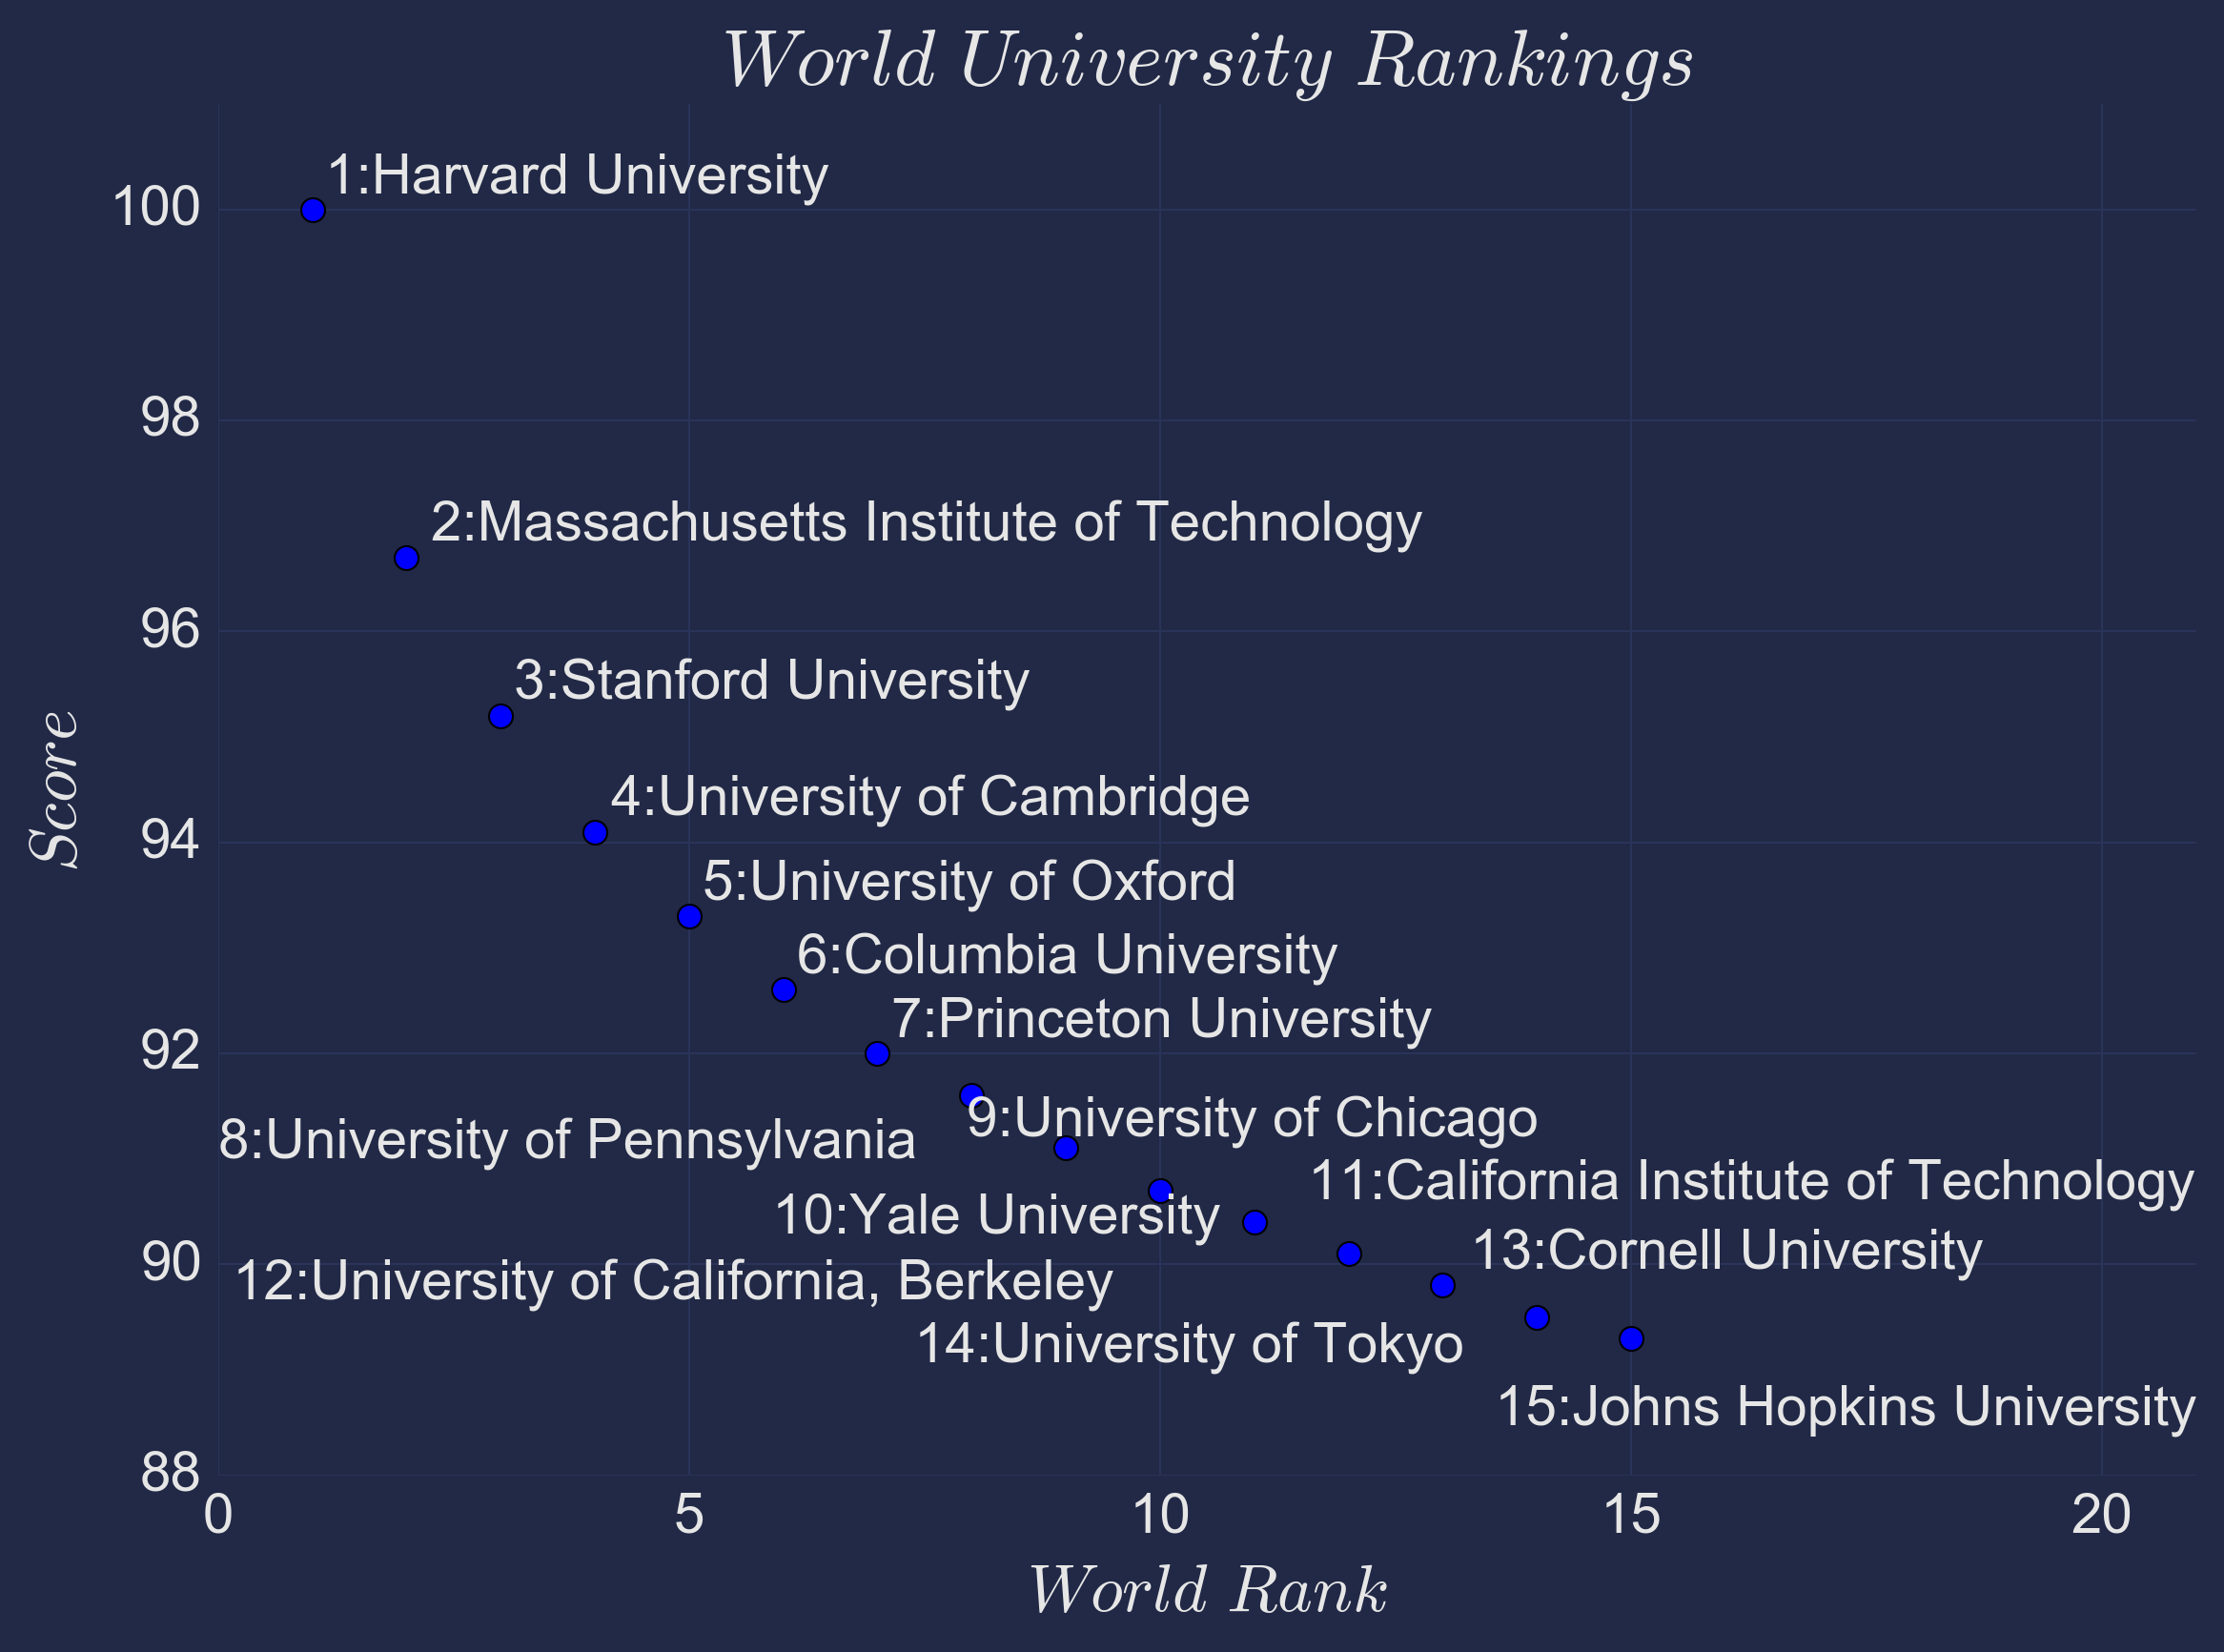

In [93]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
import pandas as pd
plt.style.use('cyberpunk')
plt.rcParams['figure.dpi'] = 300

university_top = pd.read_table('World University Rankings/cwur2020.txt', header=0).iloc[:15,:]
university_top['world_rank'] = university_top['World Rank'] 
university_top['score'] = university_top['Score'] 

fig, ax = plt.subplots()
ax.set_xlabel('$World\ Rank$')
ax.set_ylabel('$Score$')

plt.title('$World\ University\ Rankings$', size=20)
plt.plot(university_top.world_rank.values, university_top.score.values, 'bo')

plt.ylim([88,101])
plt.xlim([0,21])
plt.tight_layout()

texts = [plt.text(university_top.world_rank.values[i], university_top.score.values[i], '{}:'.format(i+1)+university_top.Institution.values[i]) for i in range(len(university_top))]
adjust_text(texts,lw=0.5)


In [ ]:
usa_college

In [92]:
university_top_10.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

500

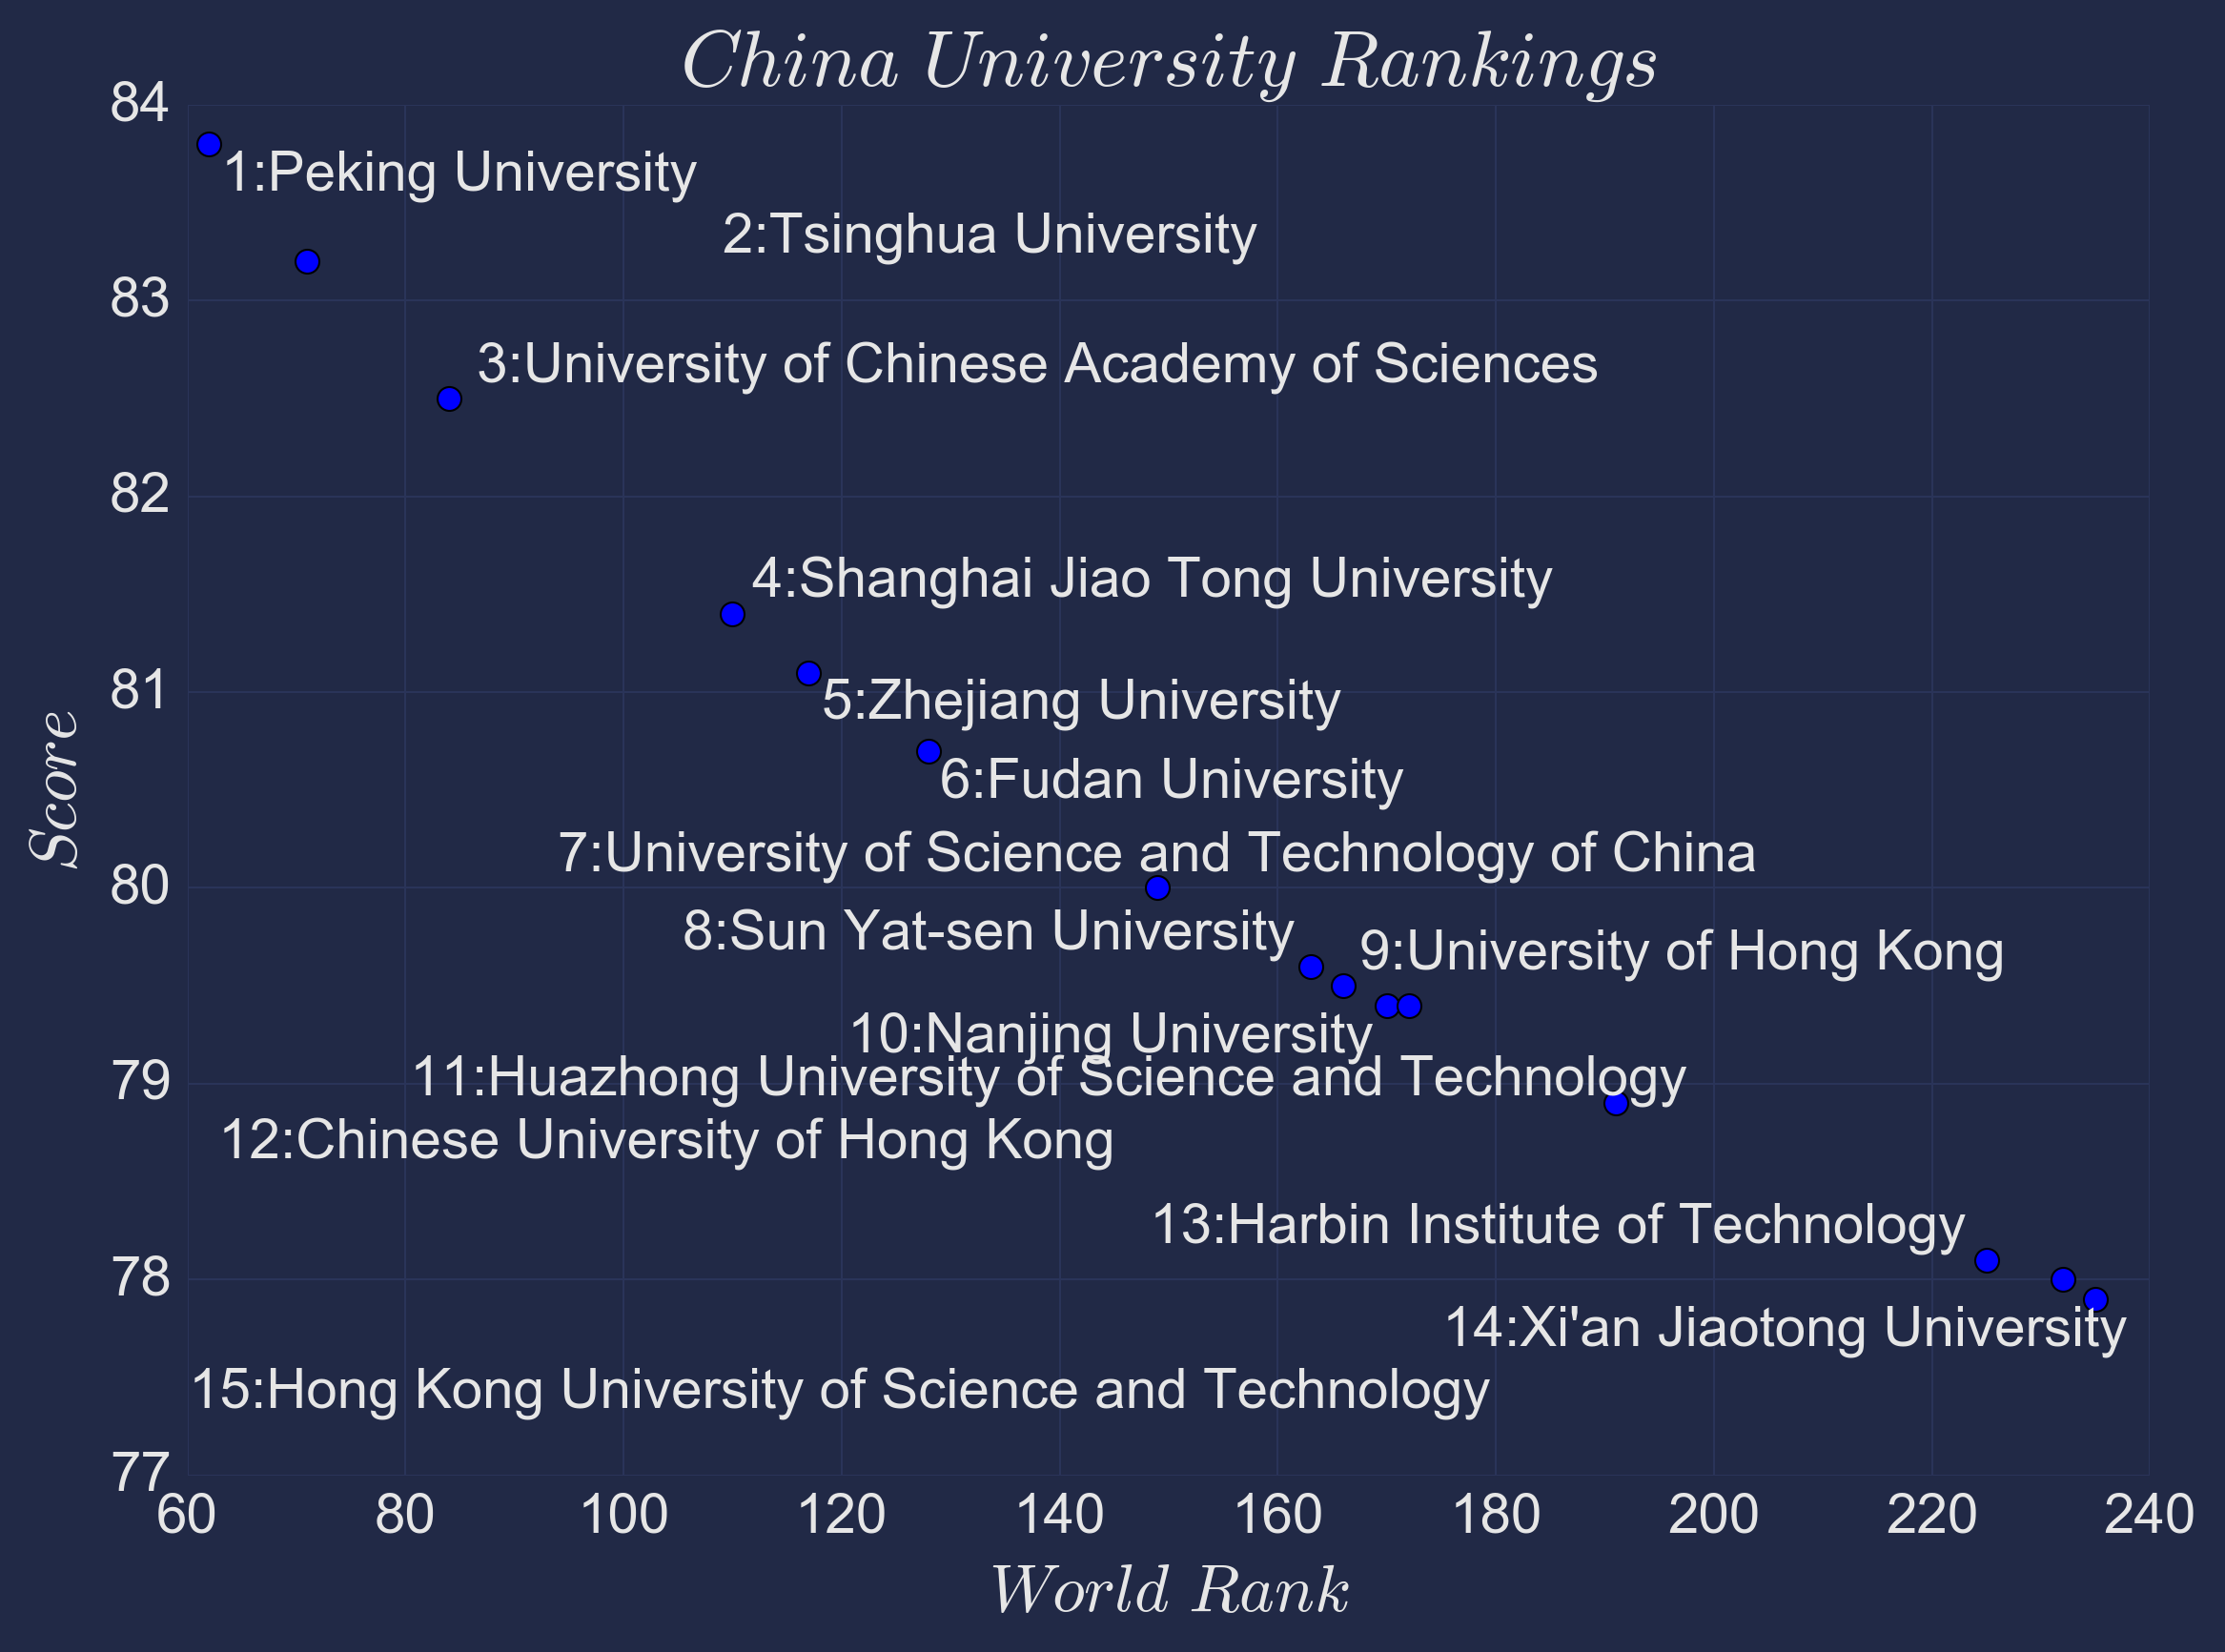

In [97]:
university = pd.read_table('World University Rankings/cwur2020.txt', header=0)
university = university[university['Location']=='China'].iloc[:15,:]

university['world_rank'] = university['World Rank'] 
university['score'] = university['Score'] 

fig, ax = plt.subplots()
ax.set_xlabel('$World\ Rank$')
ax.set_ylabel('$Score$')

plt.title('$China\ University\ Rankings$', size=20)
plt.plot(university.world_rank.values, university.score.values, 'bo')

# plt.ylim([88,101])
# plt.xlim([0,21])
plt.tight_layout()

texts = [plt.text(university.world_rank.values[i], university.score.values[i], '{}:'.format(i+1)+university.Institution.values[i]) for i in range(len(university_top))]
adjust_text(texts,lw=0.5)

In [113]:
len(university[university['World Rank'] >=101])

1900

In [115]:
university[(university['Location'] != 'China') & (university['Location'] != 'USA')]

World Rank                               Institution        Location  \
3              4                   University of Cambridge  United Kingdom   
4              5                      University of Oxford  United Kingdom   
13            14                       University of Tokyo           Japan   
18            19                 University College London  United Kingdom   
20            21                            PSL University          France   
...          ...                                       ...             ...   
1995        1996         Polytechnic Institute of Bragança        Portugal   
1996        1997            Federal University of Maranhão          Brazil   
1997        1998  Autonomous University of Baja California          Mexico   
1998        1999              American University in Cairo           Egypt   
1999        2000                        Kyonggi University     South Korea   

      National Rank Quality of Education Alumni Employment Quality of Faculty  \
3                 1                    1                21                  4   
4                 2                    7                26                  9   
13                1                   37                 7                105   
18                3                   33               666                 14   
20                1                   16                27                100   
...             ...                  ...               ...                ...   
1995             15                    -                 -                  -   
1996             57                    -                 -                  -   
1997             20                    -                 -                  -   
1998             18                    -               299                  -   
1999             61                    -                 -                  -   

     Research Performance  Score  
3                      11   94.1  
4                       4   93.3  
13                     27   89.5  
18                      8   88.4  
20                    121   88.0  
...                   ...    ...  
1995                 1917   65.8  
1996                 1918   65.8  
1997                 1921   65.8  
1998                    -   65.8  
1999                 1922   65.8  

[1376 rows x 9 columns]

In [156]:
university = pd.read_table('World University Rankings/cwur2020.txt', header=0)

usa_college = university[university['Location']=='USA']
china_college = university[university['Location']=='China']
other_colleage = university[(university['Location'] != 'China') & (university['Location'] != 'USA')]

usa_college_ratio = round(len(university[university['Location']=='USA'])/len(university) ,2)
china_college_ratio = round(len(university[university['Location']=='China'])/len(university) ,2)
other_colleage_ratio = 1-usa_college_ratio-china_college_ratio

# china_rank_100 = round(len(china_college[china_college['World Rank']<=100]) / len(china_college) ,2)
# china_rank_500 = round(len(china_college[(china_college['World Rank']>=101) & (china_college['World Rank']<=500)]) / len(china_college) ,2)
# china_rank_1000 =  round(len(china_college[(china_college['World Rank']>=501) & (china_college['World Rank']<=1000)]) / len(china_college) ,2)
# china_rank_2000 =  round(len(china_college[(china_college['World Rank']>=1001) & (china_college['World Rank']<=2000)]) / len(china_college) ,2)
# ratios = [china_rank_100, china_rank_500, china_rank_1000, china_rank_2000]

name = ['Top 100','Top 101-500','Top 501-1000','Top 1001-2000']

china_dist = []
china_dist.append(len(china_college[china_college['World Rank']<=100]))
china_dist.append(len(china_college[(china_college['World Rank']>=101) & (china_college['World Rank']<=500)]))
china_dist.append(len(china_college[(china_college['World Rank']>=501) & (china_college['World Rank']<=1000)]))
china_dist.append(len(china_college[(china_college['World Rank']>=1001) & (china_college['World Rank']<=2000)]))

china_dist

[3, 46, 77, 141]

In [177]:
usa_dist = []
usa_dist.append(len(usa_college[usa_college['World Rank']<=100]))
usa_dist.append(len(usa_college[(usa_college['World Rank']>=101) & (usa_college['World Rank']<=500)]))
usa_dist.append(len(usa_college[(usa_college['World Rank']>=501) & (usa_college['World Rank']<=1000)]))
usa_dist.append(len(usa_college[(usa_college['World Rank']>=1001) & (usa_college['World Rank']<=2000)]))
usa_dist

[51, 90, 82, 134]

In [172]:
china_dist = [[100,500,1000,2000],[3, 46, 77, 141]]

In [144]:
len(china_college[china_college['World Rank']<=100])

3

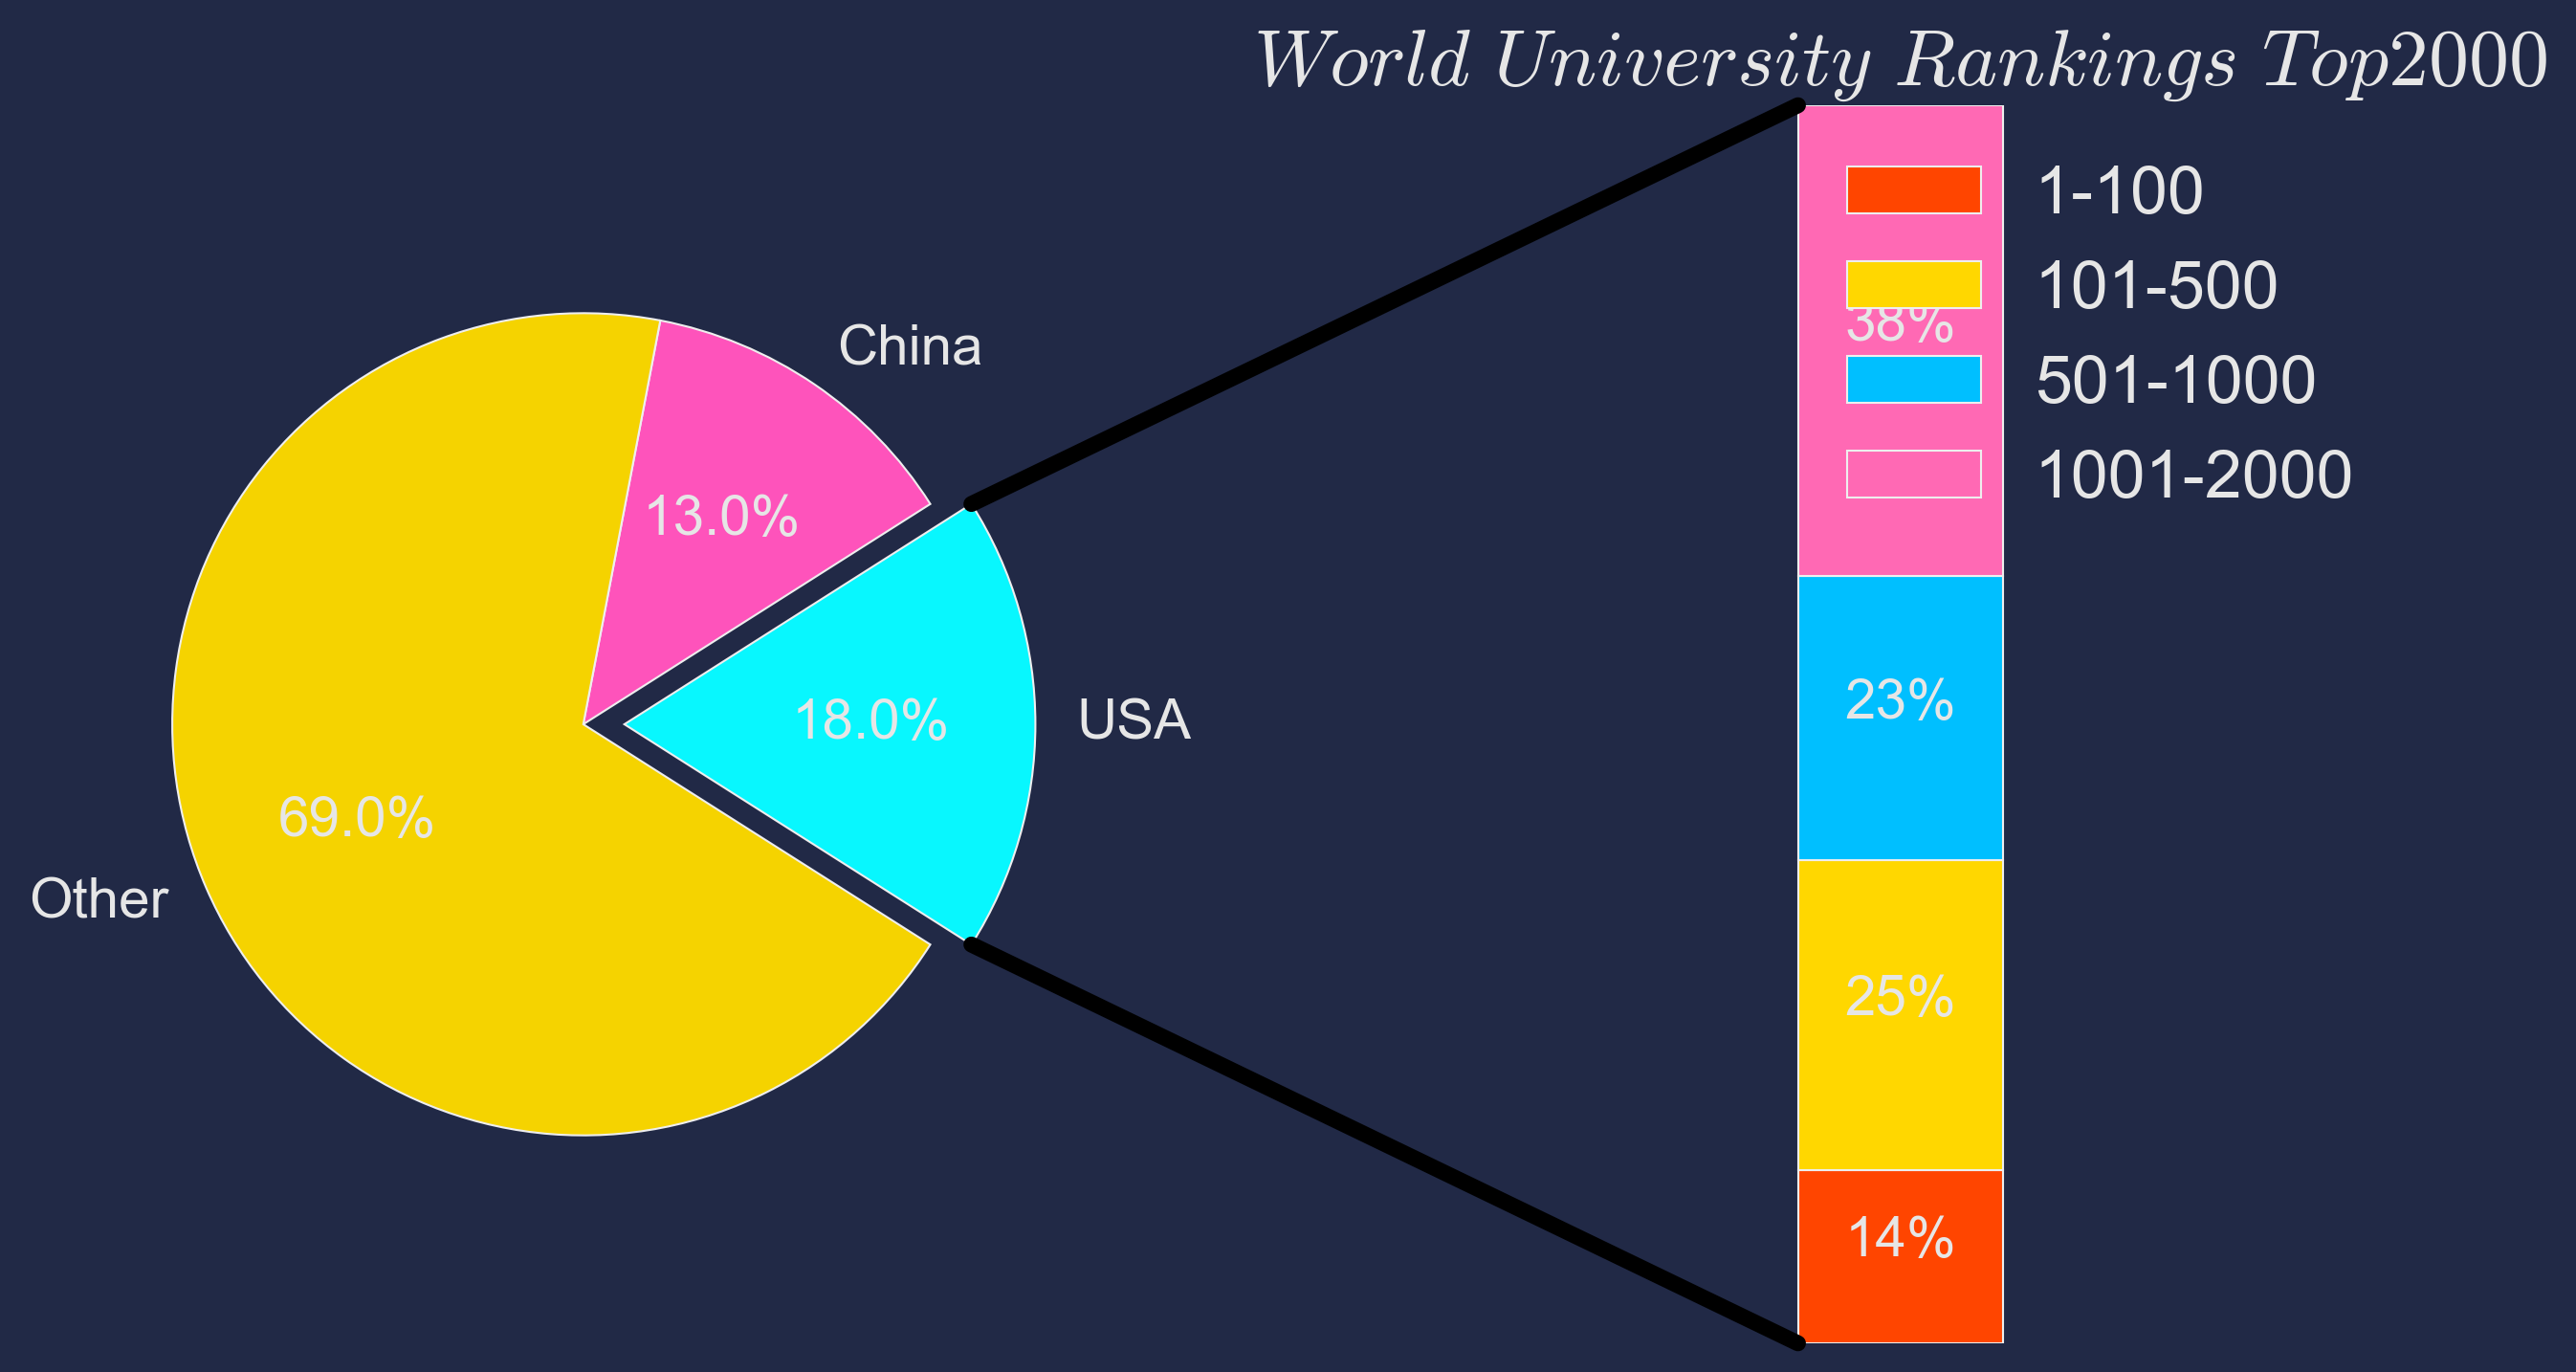

In [174]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

university = pd.read_table('World University Rankings/cwur2020.txt', header=0)

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
usa_college = university[university['Location']=='USA']
china_college = university[university['Location']=='China']
other_colleage = university[(university['Location'] != 'China') & (university['Location'] != 'USA')]

usa_college_ratio = round(len(university[university['Location']=='USA'])/len(university) ,2)
china_college_ratio = round(len(university[university['Location']=='China'])/len(university) ,2)
other_colleage_ratio = 1-usa_college_ratio-china_college_ratio

ratios = [usa_college_ratio, china_college_ratio, other_colleage_ratio]
labels = ['USA', 'China', 'Other']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, 
        autopct='%1.1f%%',
        startangle=angle,
        labels=labels, 
        explode=explode)


# bar chart parameters
xpos = 0
bottom = 0


# china_rank_100 = round(len(china_college[china_college['World Rank']<=100]) / len(china_college) ,2)
# china_rank_500 = round(len(china_college[(china_college['World Rank']>=101) & (china_college['World Rank']<=500)]) / len(china_college) ,2)
# china_rank_1000 =  round(len(china_college[(china_college['World Rank']>=501) & (china_college['World Rank']<=1000)]) / len(china_college) ,2)
# china_rank_2000 =  round(len(china_college[(china_college['World Rank']>=1001) & (china_college['World Rank']<=2000)]) / len(china_college) ,2)
# ratios = [china_rank_100, china_rank_500, china_rank_1000, china_rank_2000]



usa_rank_100 = round(len(usa_college[usa_college['World Rank']<=100]) / len(usa_college) ,2)
usa_rank_500 = round(len(usa_college[(usa_college['World Rank']>=101) & (usa_college['World Rank']<=500)]) / len(usa_college) ,2)
usa_rank_1000 =  round(len(usa_college[(usa_college['World Rank']>=501) & (usa_college['World Rank']<=1000)]) / len(usa_college) ,2)
usa_rank_2000 =  round(len(usa_college[(usa_college['World Rank']>=1001) & (usa_college['World Rank']<=2000)]) / len(usa_college) ,2)
ratios = [usa_rank_100, usa_rank_500, usa_rank_1000, usa_rank_2000]


width = .2
# colors = [[.1, .1, .5], [.3, .3, .3], [.5, .5, .7], [.7, .7, .7]]
# colors = ['red', 'orange', 'lime', 'fuchsia']
colors = ['orangered', 'gold', 'deepskyblue', 'hotpink']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    
    ypos = bottom + ax2.patches[j].get_height() / 2
    
    bottom += height
    
    ax2.text(xpos, ypos, 
             "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Rankings')
ax2.legend(('1-100', '101-500', '501-1000', '1001-2000'),loc='best')
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.title('$World\ University\ Rankings\ Top2000$')

# plt.xticks([]) 
# plt.grid()
# plt.table(cellText=[['%.2f'%j for j in i] for i in np.array(china_dist)], cellColours=plt.cm.GnBu(np.array(china_dist)), loc='bottom') 

plt.tight_layout()
plt.show()

In [160]:
x = np.random.rand(5, 8)*.7 
x

array([[0.25165553, 0.30592237, 0.48834184, 0.04215783, 0.4667367 ,
        0.46944651, 0.14726779, 0.09024841],
       [0.22079985, 0.25459754, 0.39913774, 0.30702106, 0.69186169,
        0.07143137, 0.14621373, 0.11291666],
       [0.45717583, 0.17730412, 0.32641754, 0.17109791, 0.11127871,
        0.0772626 , 0.45943071, 0.09672807],
       [0.13760765, 0.25810762, 0.57469526, 0.06797089, 0.58656144,
        0.06726889, 0.68352163, 0.32805584],
       [0.68373276, 0.42339186, 0.51748451, 0.02743145, 0.19796487,
        0.08413759, 0.20729814, 0.0831094 ]])

In [183]:
usa_dist

[51, 90, 82, 134]

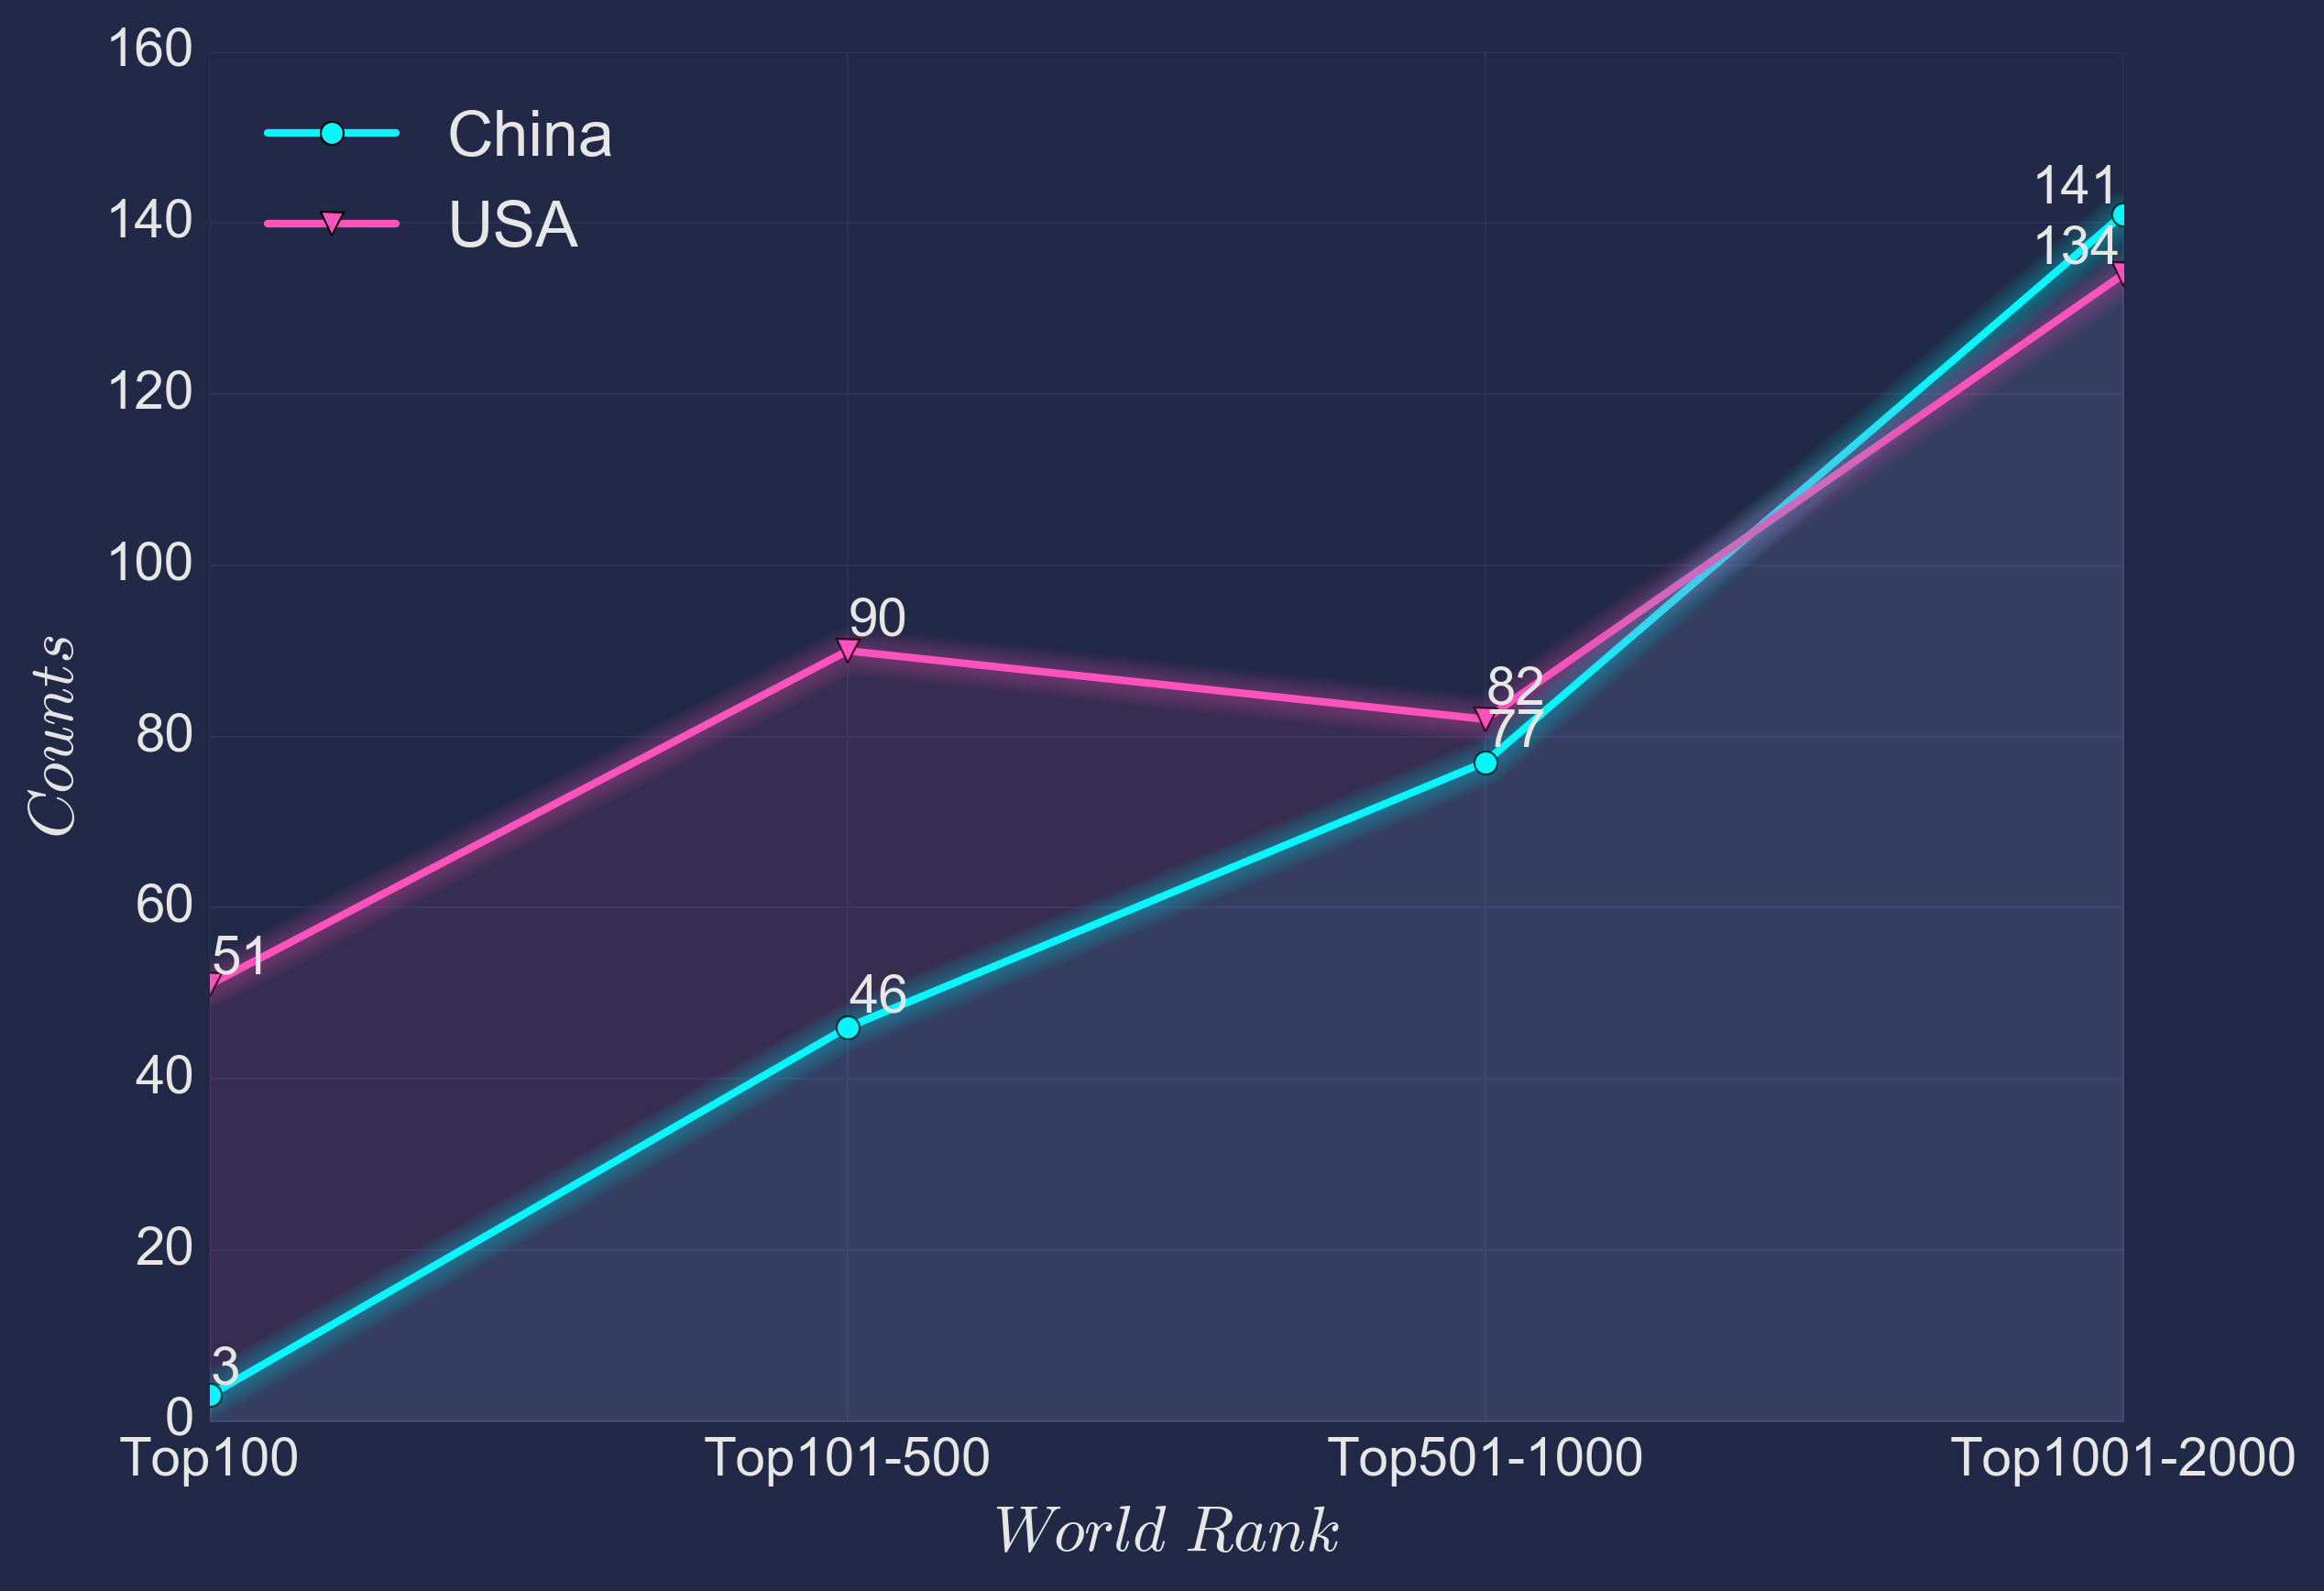

In [199]:
# !pip install mplcyberpunk
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')
x = ['Top100', 'Top101-500', 'Top501-1000', 'Top1001-2000']
y1 = [3, 46, 77, 141]
y2 = [51, 90, 82, 134]
l1, = plt.plot(x, y1, marker='o')
l2, = plt.plot(x, y2, marker='v')

# Add glow effects-Optional
mplcyberpunk.add_glow_effects()
texts1 = [plt.text(x[i], y1[i], y1[i]) for i in range(len(y1))]
adjust_text(texts1,lw=0.5)
texts2 = [plt.text(x[i], y2[i], y2[i]) for i in range(len(y2))]
adjust_text(texts2,lw=0.5)
plt.xlabel('$World\ Rank$')
plt.ylabel('$Counts$')
plt.legend(handles=[l1, l2], labels=['China', 'USA'], loc='upper left')
plt.show()

In [ ]:
T